## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

MSFT:
                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2011-11-30  25.590000  25.139999  25.370001  25.580000  81350900.0  20.704653
2011-12-01  25.629999  25.200001  25.559999  25.280001  48545400.0  20.461828
2011-12-02  25.620001  25.160000  25.590000  25.219999  52293800.0  20.413261
2011-12-05  25.799999  25.500000  25.780001  25.700001  56818400.0  20.801779
2011-12-06  25.870001  25.610001  25.809999  25.660000  46175300.0  20.769403 

GOOG:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  298.635651  294.939484  297.858551  298.575867  6819466.0   
2011-12-01  306.849854  298.381592  298.879730  305.739014  7268342.0   
2011-12-02  310.834900  306.979370  307.372894  309.021698  8202028.0   
2011-12-05  314.770172  310.037903  312.648132  311.656830  6418970.0   


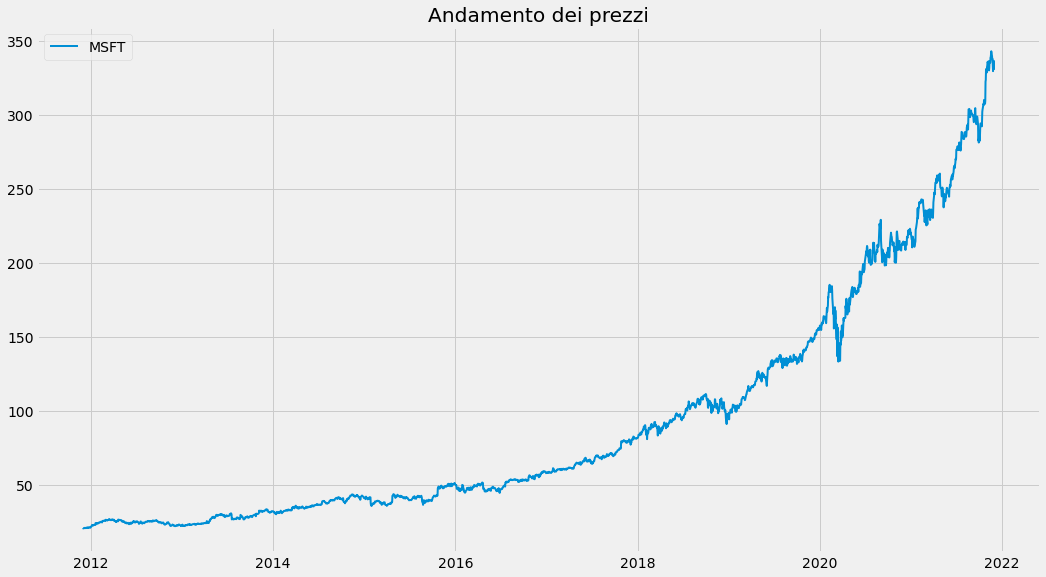

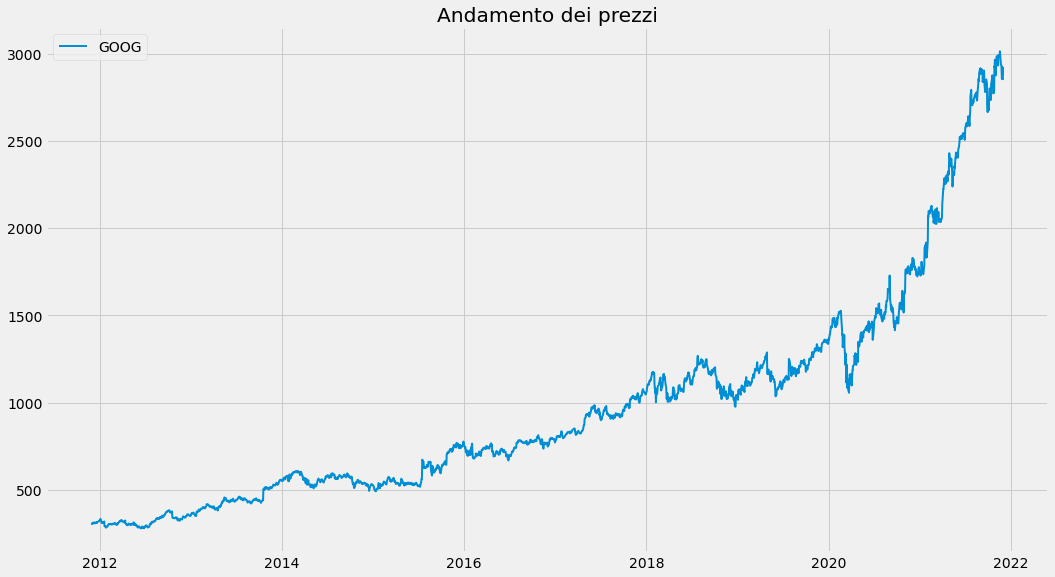

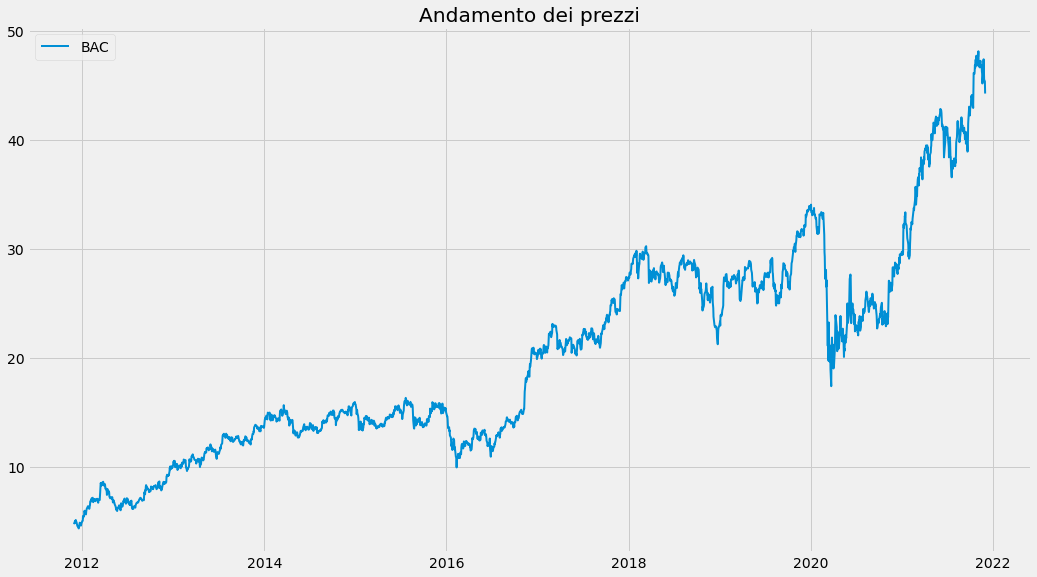

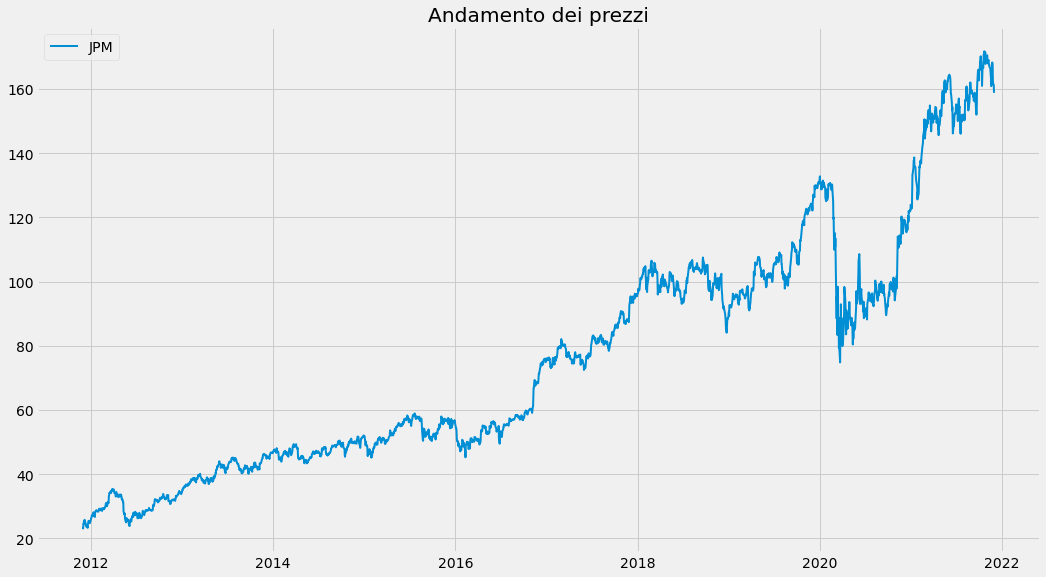

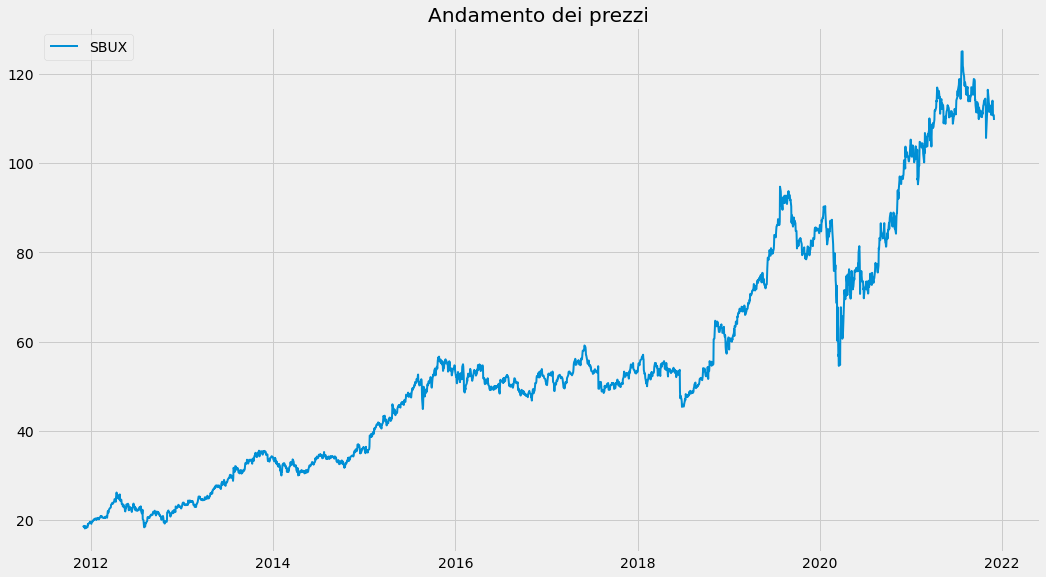

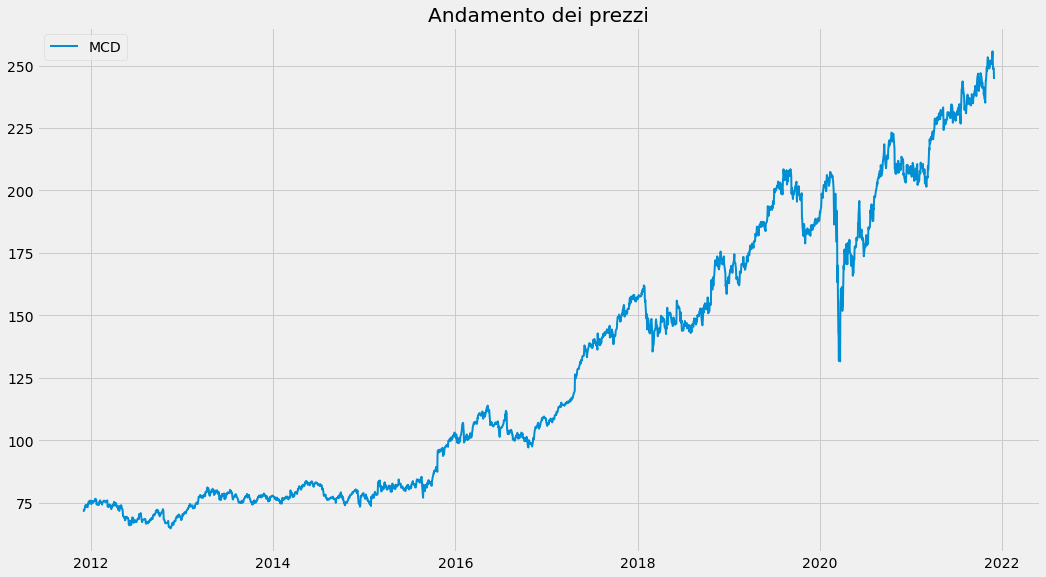

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
plt.style.use('fivethirtyeight')


#Definisco le date di riferimento
start_date = '2011-11-30'
end_date = '2021-11-30'

#Specifico la lista di tickers che mi interessano
tickers = ['MSFT', 'GOOG', 'BAC', 'JPM', 'SBUX', 'MCD']

#Inizializzo il dictionary principale che conerrà i dataframe relativi agli stock
datasets = {}


#plt.figure(figsize=(16, 9))
for ticker in tickers:
    plt.figure(figsize=(16, 9))
    #Scarico i dati da yahoo e faccio un grafico dei prezzi
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    plt.title('Andamento dei prezzi')
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = ticker, linewidth = 2)
    plt.legend()
    print(ticker + ':\n', datasets[ticker].head(), '\n')

#Salvo l'immagine
plt.savefig('./immagini/prezzi.png')

/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWar

===STATISTICHE UNIVARIATE===

MSFT:
Media: 0.0012299138042278046
Varianza: 0.0003
Deviazione Stamdard: 0.016012082141629157
Asimmetria: 0.04279887003399936
Curtosi: 10.772826796567358

GOOG:
Media: 0.0010223309900170476
Varianza: 0.0003
Deviazione Stamdard: 0.015880523060674858
Asimmetria: 0.5573908168327004
Curtosi: 11.195789284117156

BAC:
Media: 0.0010902381797269507
Varianza: 0.0004
Deviazione Stamdard: 0.019986282208694476
Asimmetria: 0.2647816404061059
Curtosi: 9.153668443803653

JPM:
Media: 0.0009034738354599397
Varianza: 0.0003
Deviazione Stamdard: 0.016977509744586127
Asimmetria: 0.28046781542240856
Curtosi: 14.25692249579222

SBUX:
Media: 0.0008329311935350008
Varianza: 0.0002
Deviazione Stamdard: 0.015686892079160675
Asimmetria: -0.007014230576076499
Curtosi: 14.400948668536282

MCD:
Media: 0.0005609244244832148
Varianza: 0.0001
Deviazione Stamdard: 0.012213632643658514
Asimmetria: 0.5369060080736161
Curtosi: 38.570473204935944

        MSFT    GOOG     BAC     JPM    SBUX  

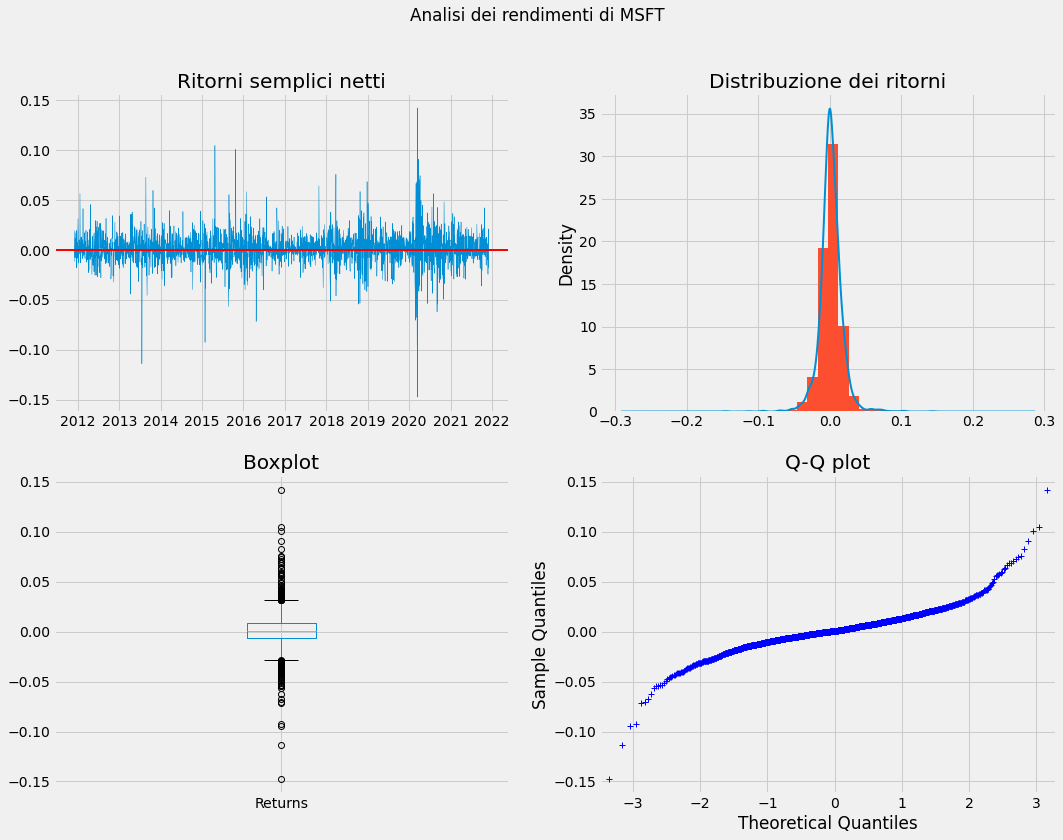

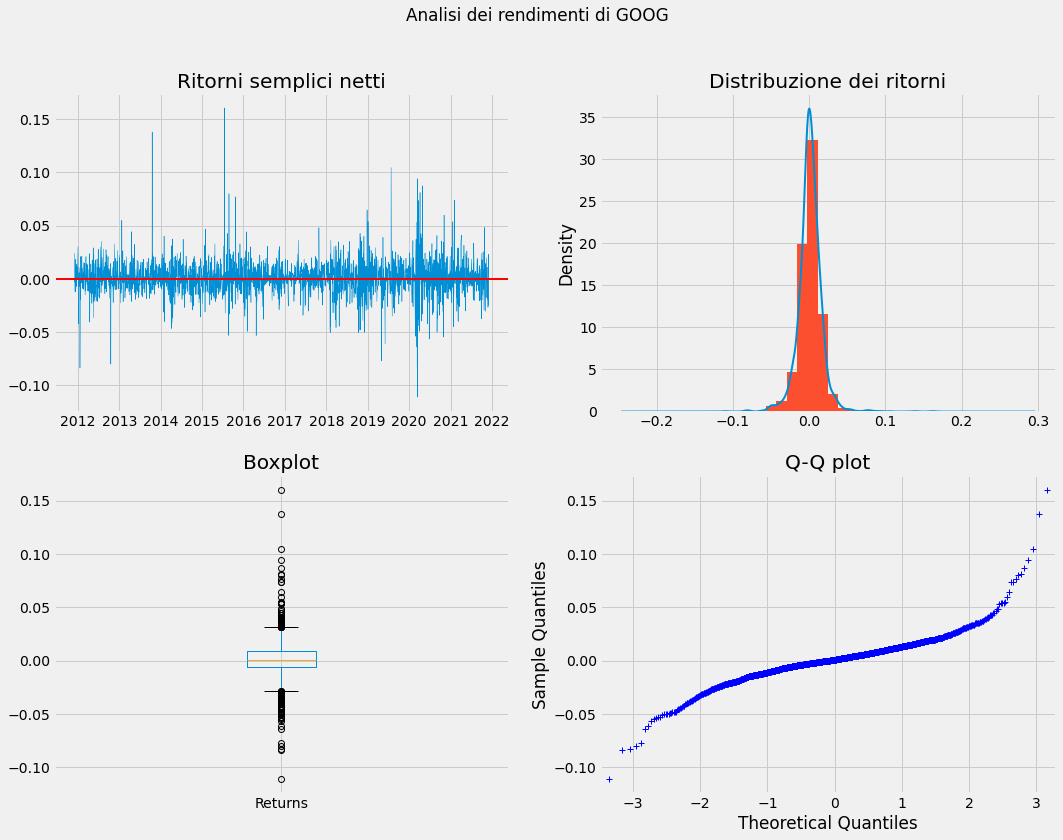

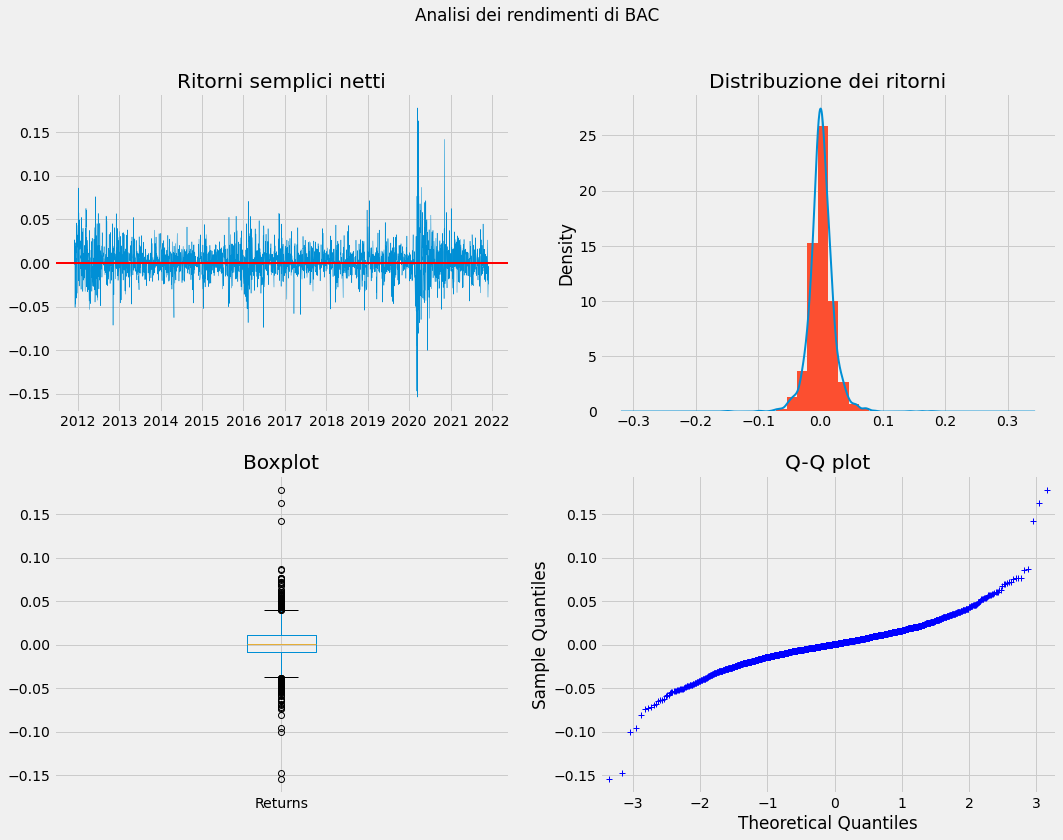

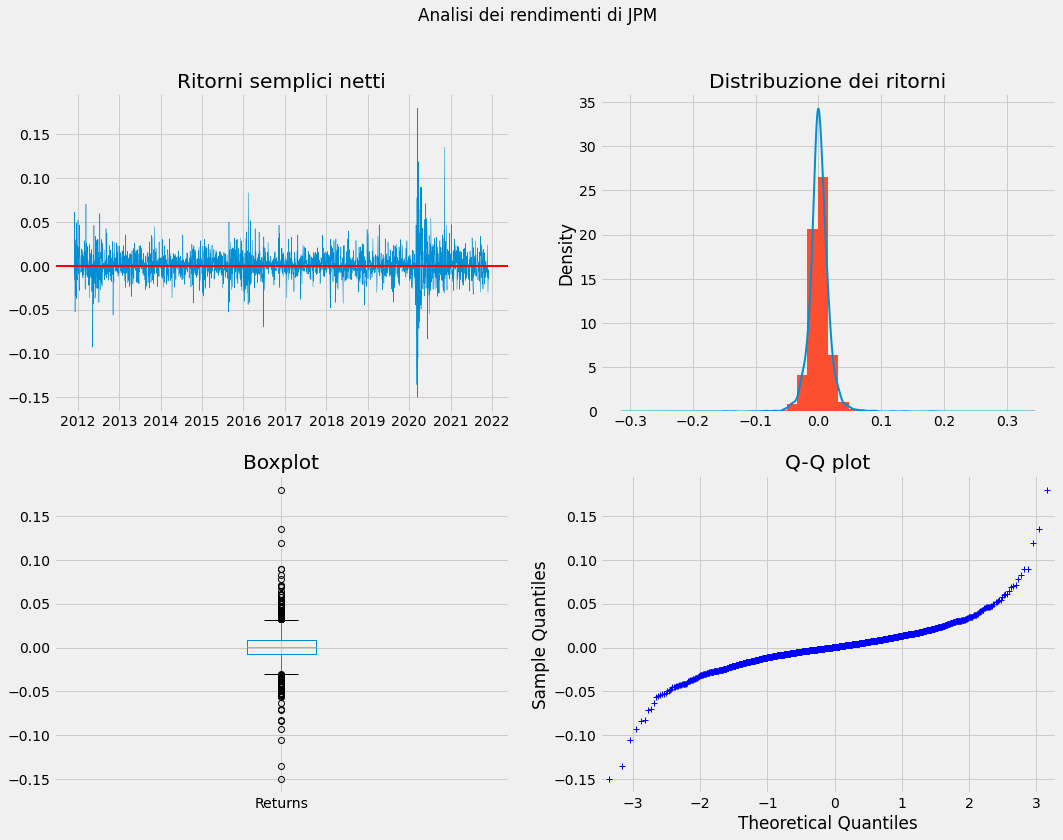

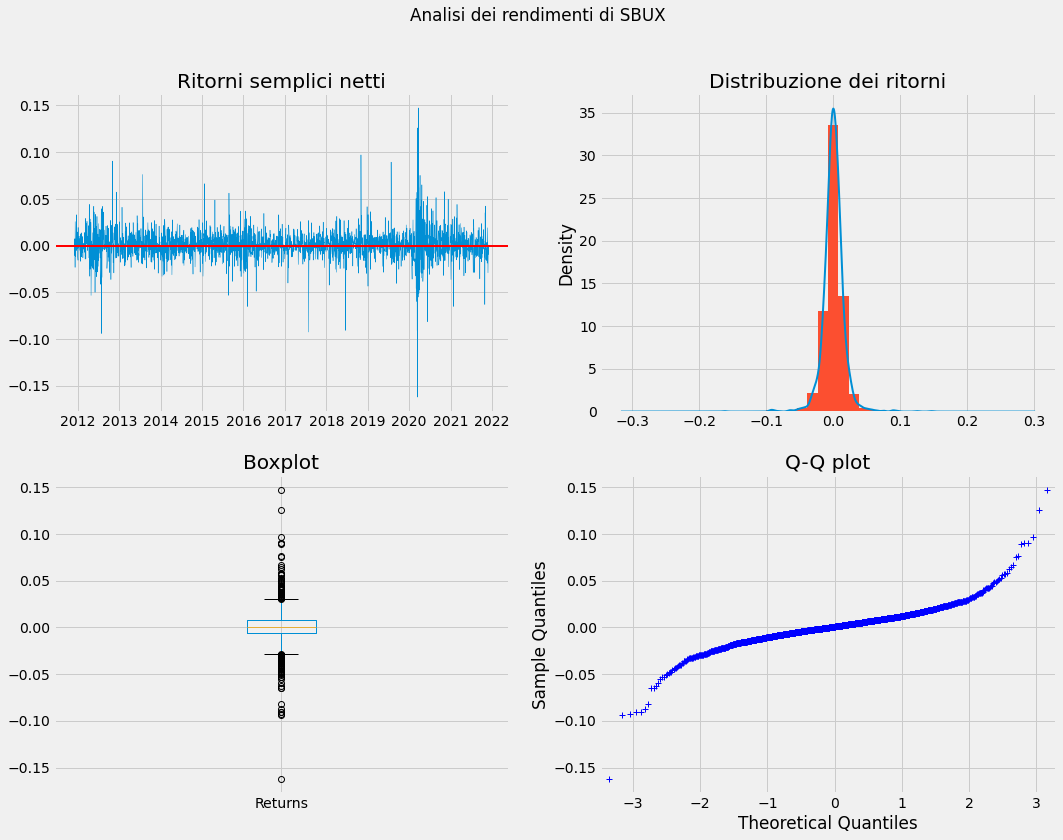

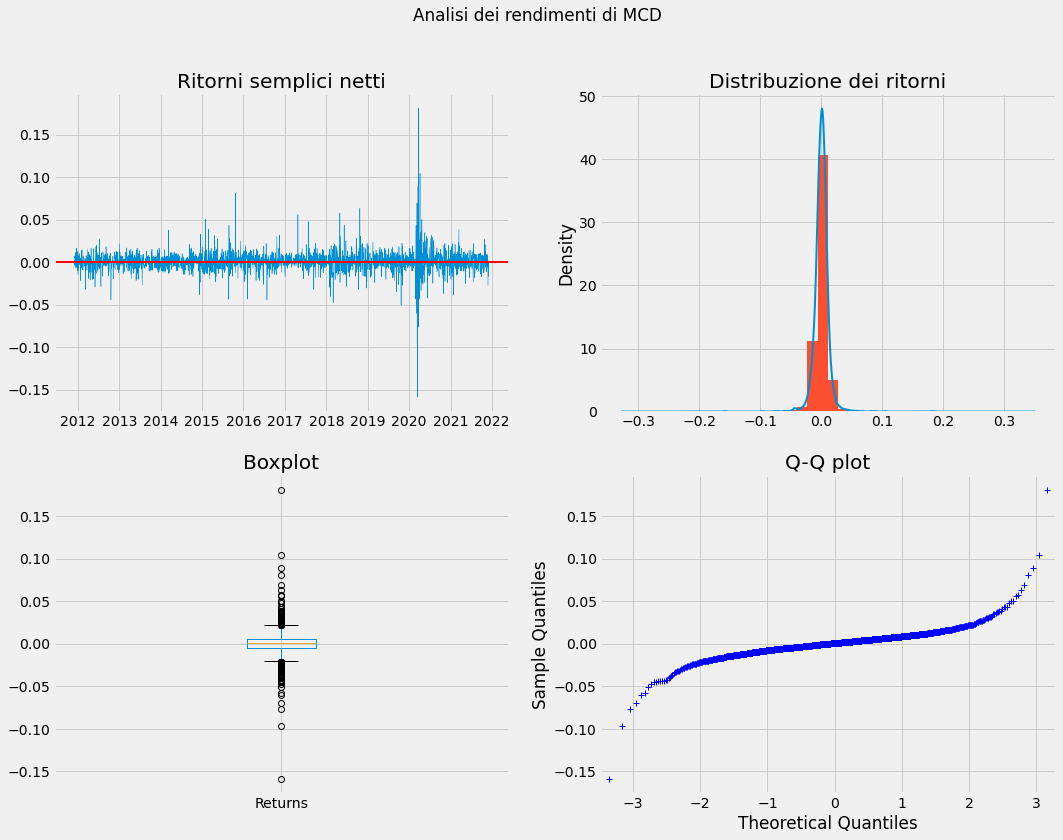

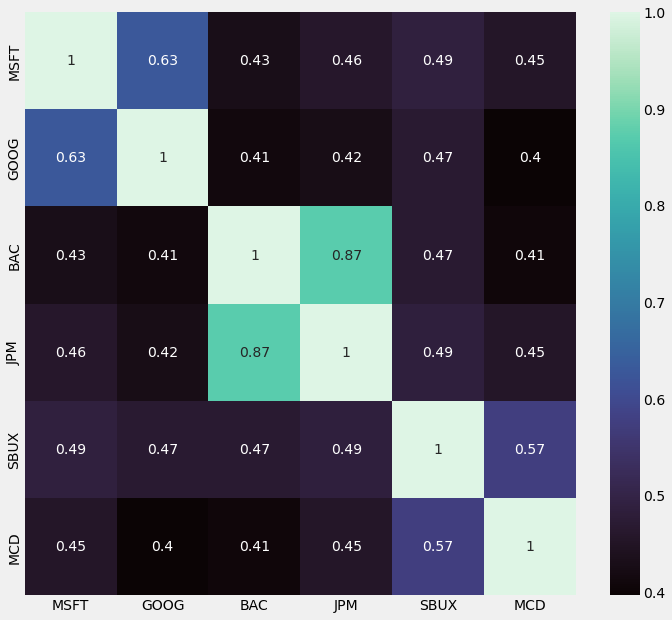

In [54]:
import statsmodels.api as sm
import seaborn as sns

# Creo un dataframe temporaneo per calcolare covarianza e correlazione più tardi
returns = pd.DataFrame()

# Scorro tutti i ticker
for ticker in tickers:

    # Creo un grafico 2X2 che contiene i dati relativi alla distribuzione dei ritorni
    fig, axes = plt.subplots(2, 2, figsize = (16, 12))
    fig.suptitle('Analisi dei rendimenti di ' + ticker)
    datasets[ticker]['Returns'] = datasets[ticker]['Adj Close'].pct_change()
    datasets[ticker]['Compounded_returns'] = (datasets[ticker]['Returns'] + 1).cumprod()
    returns[ticker] = datasets[ticker]['Returns']
    axes[0][0].plot(datasets[ticker]['Returns'] , linewidth=0.5)
    axes[0][0].set_title('Ritorni semplici netti')
    axes[0][0].axhline(0, color = 'r', linewidth = 2)
    datasets[ticker]['Returns'] .plot.kde(ax = axes[0][1], alpha=1, linewidth=2)
    axes[0][1].set_title('Distribuzione dei ritorni')
    axes[0][1].hist(datasets[ticker]['Returns'] , density=True, bins=20)
    axes[1][0].set_title('Boxplot')
    axes[1][1].set_title('Q-Q plot')
    datasets[ticker]['Returns'] .to_frame().boxplot(ax = axes[1][0])
    sm.qqplot(datasets[ticker]['Returns'] , ax=axes[1][1], marker='+')

    #Salvo il grafico
    plt.savefig('./immagini/' + ticker + '_diagnostico.png')


# Calcolo e stampo alcune statistiche dei singoli stock
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(datasets[ticker]['Returns'].mean()))
    std = datasets[ticker]['Returns'] .std()
    var = datasets[ticker]['Returns'] .var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(datasets[ticker]['Returns'] .skew()))
    print('Curtosi: ' + str(datasets[ticker]['Returns'] .kurtosis()) + '\n')

print(np.round(returns.cov(), 4))

# Creo il grafico di correlazione
plt.figure(figsize=(11, 10))
sns.heatmap(returns.corr(), annot = True, cmap='mako')
plt.savefig('./immagini/Correlazioni.png')
plt.show()


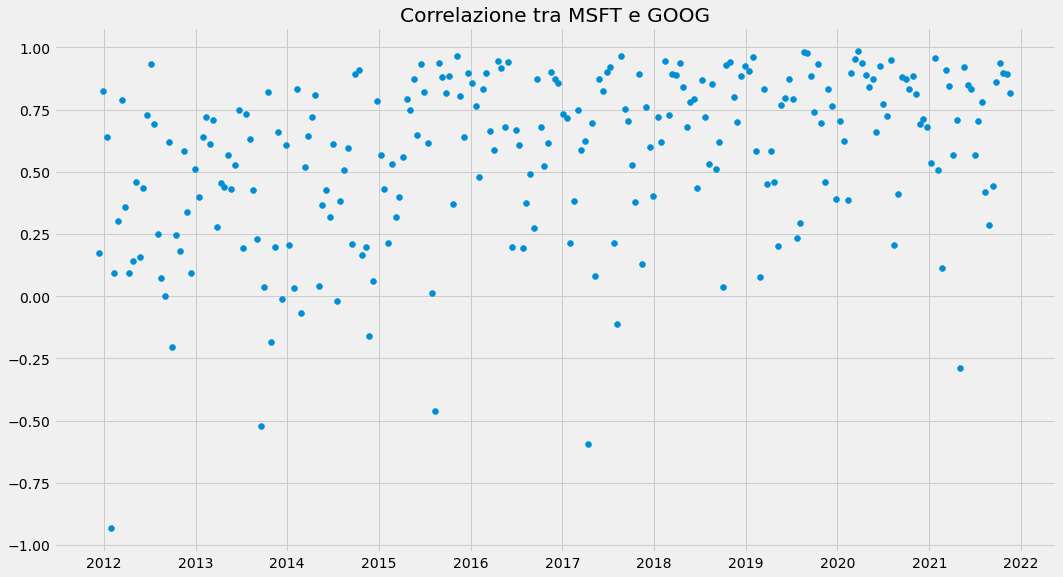

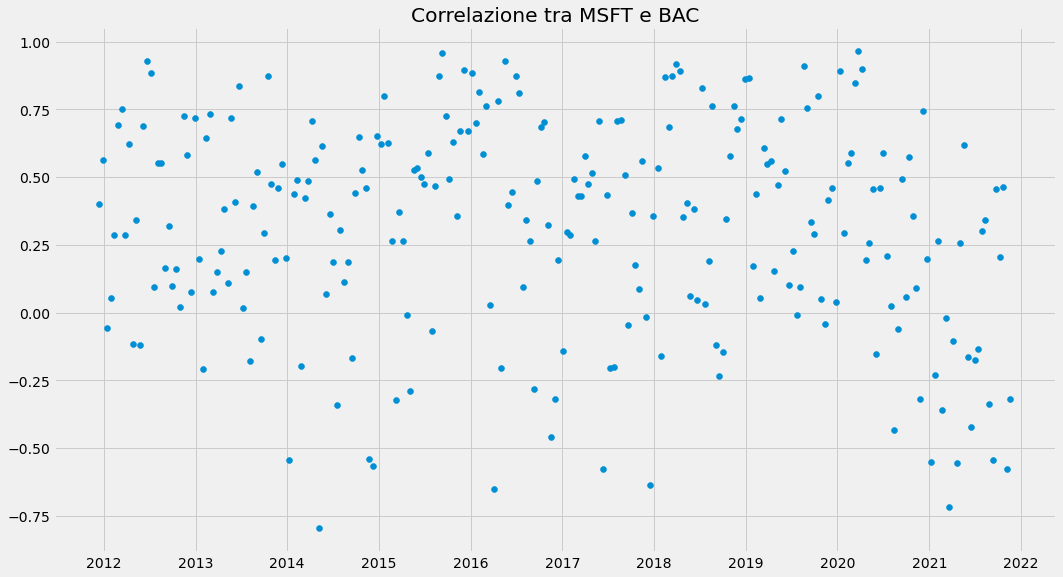

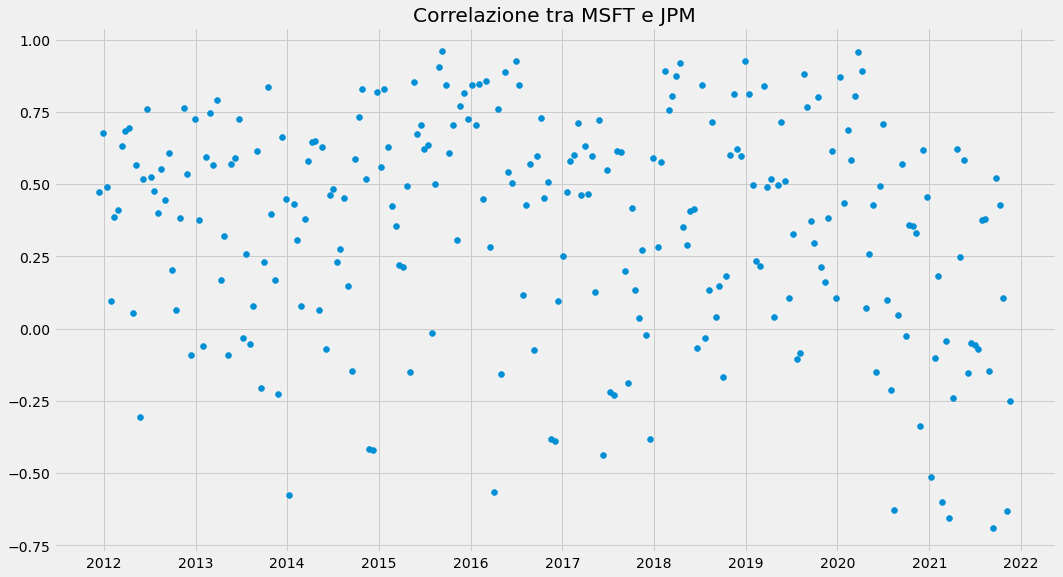

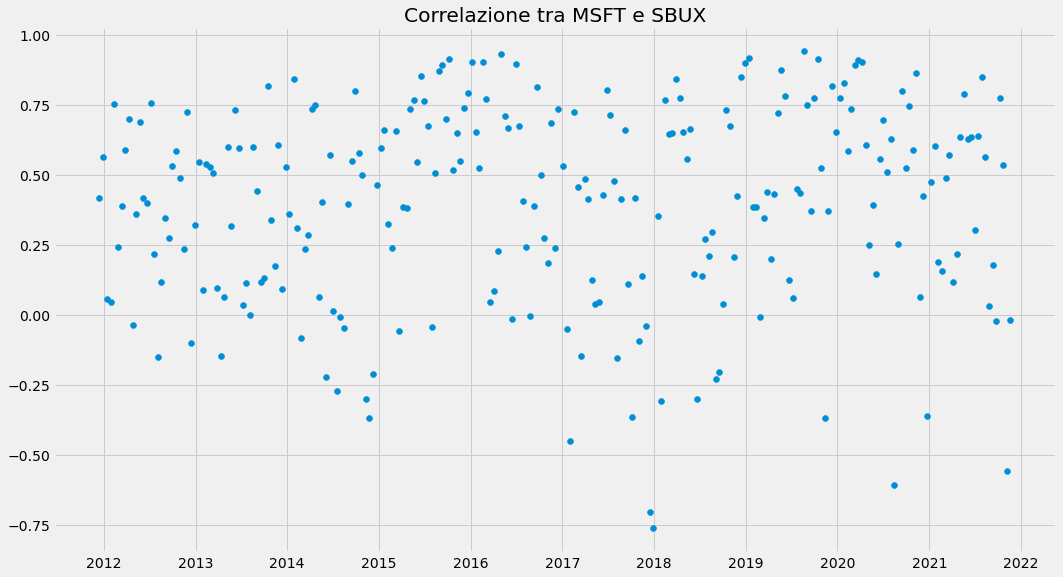

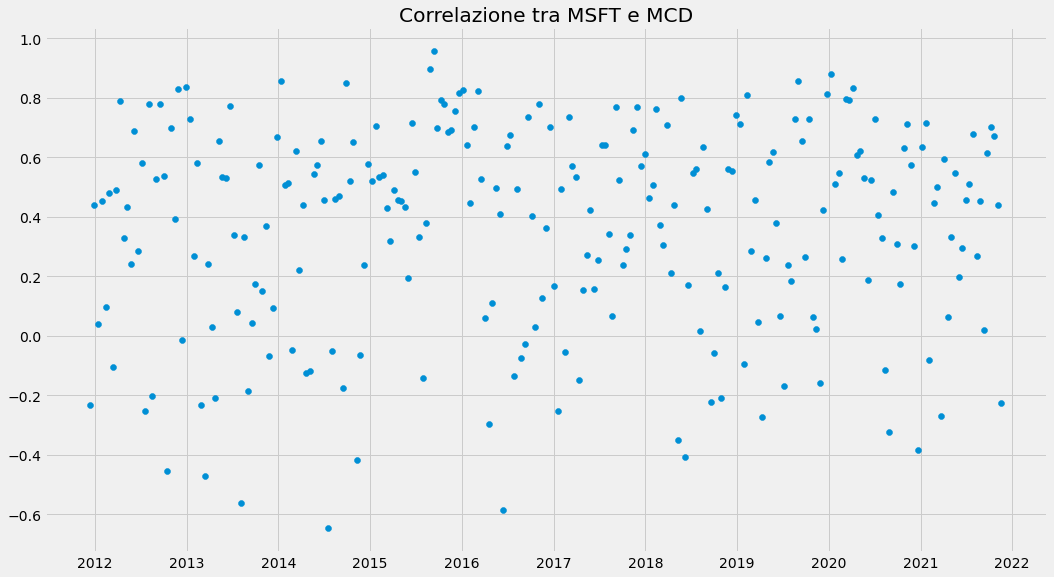

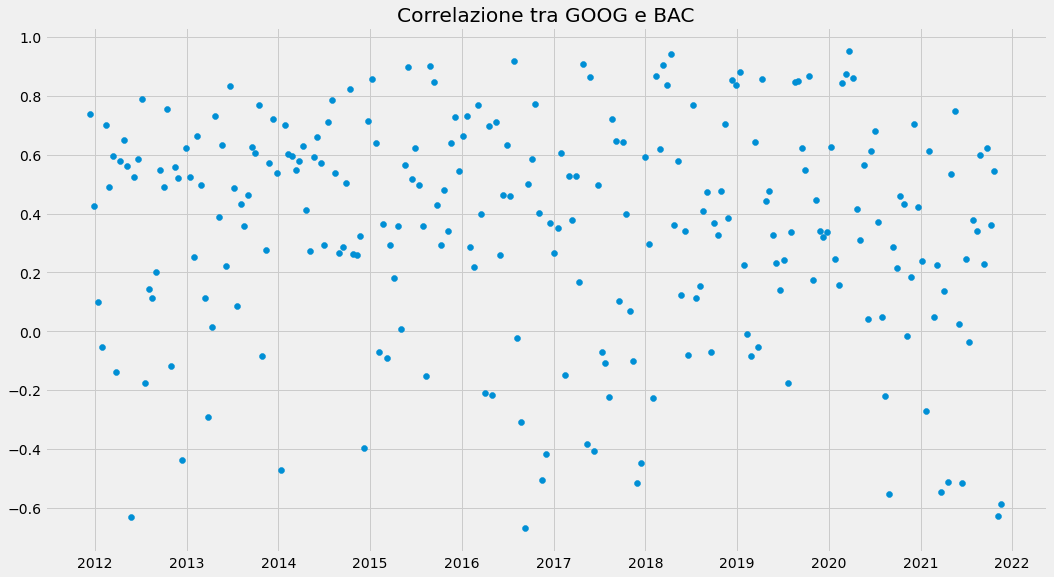

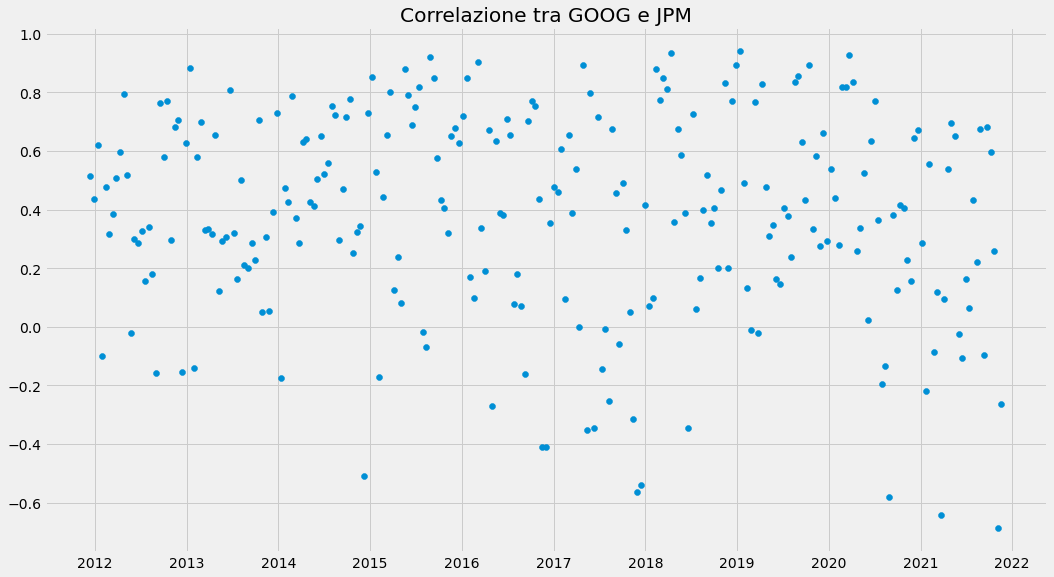

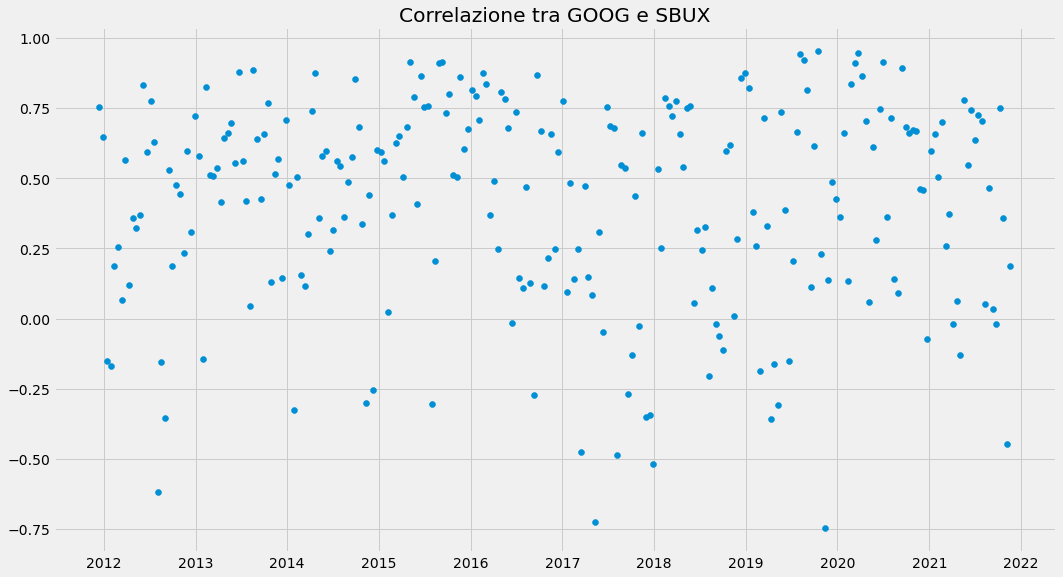

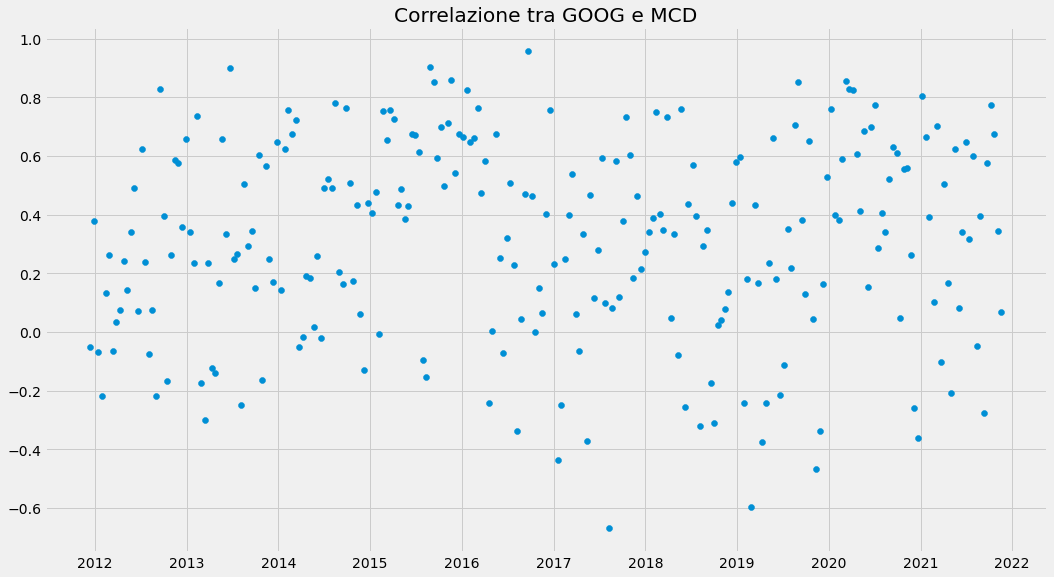

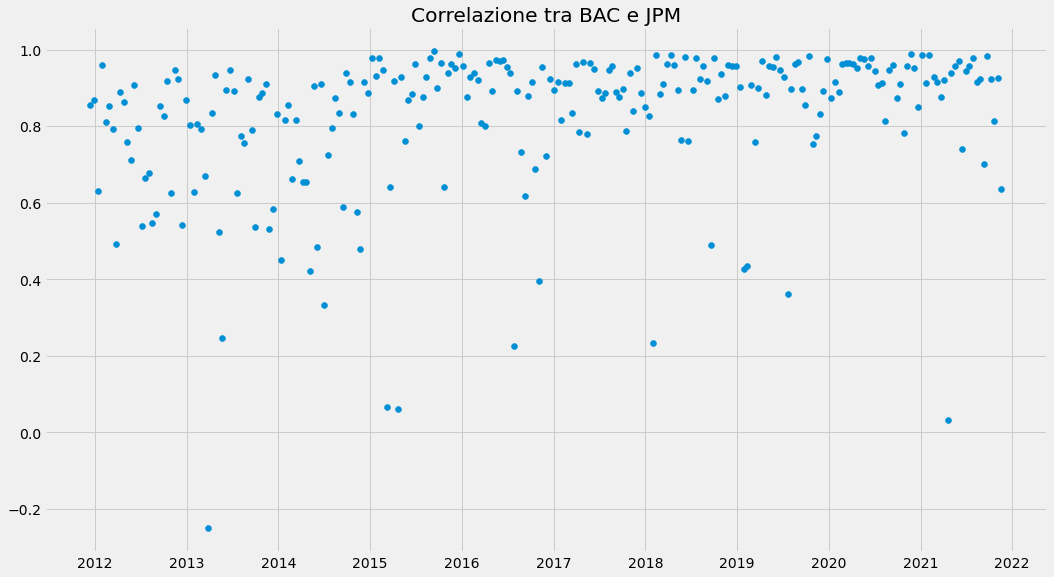

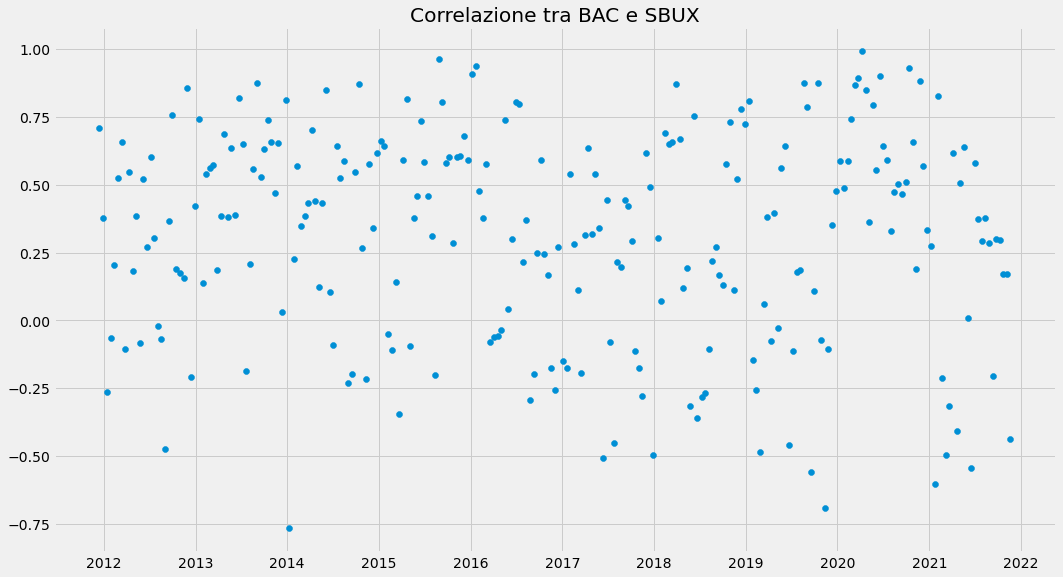

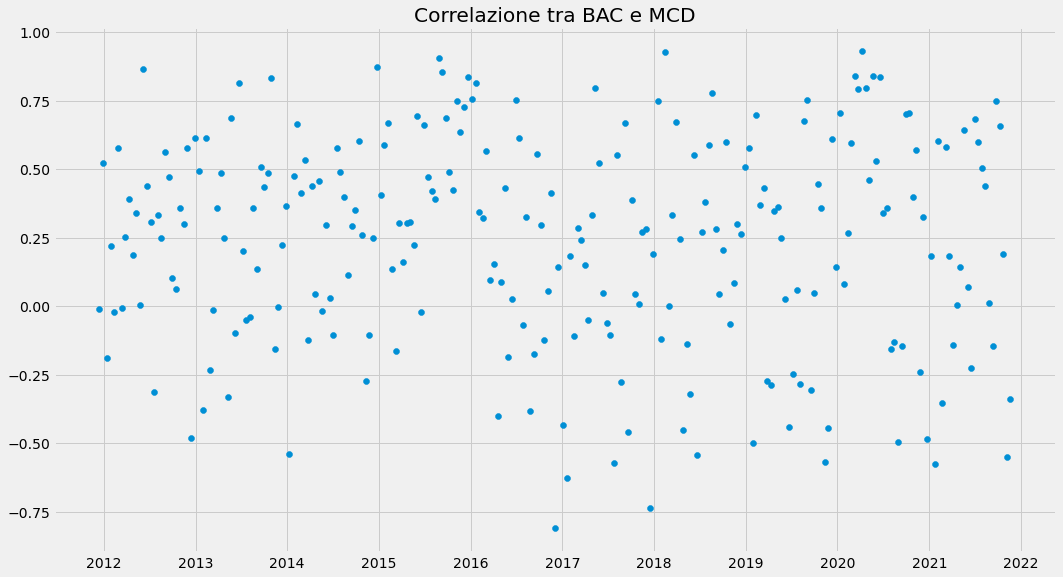

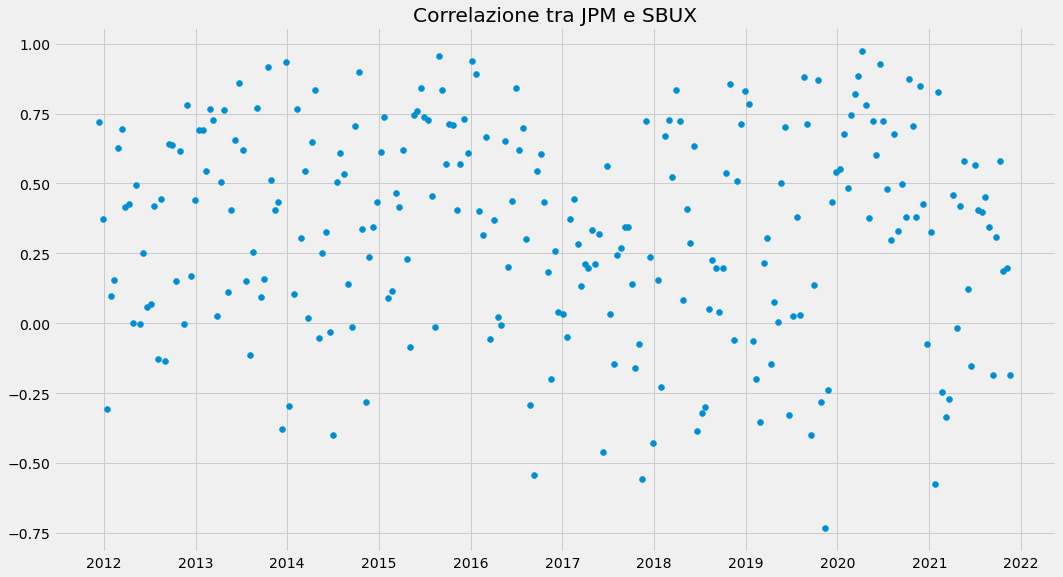

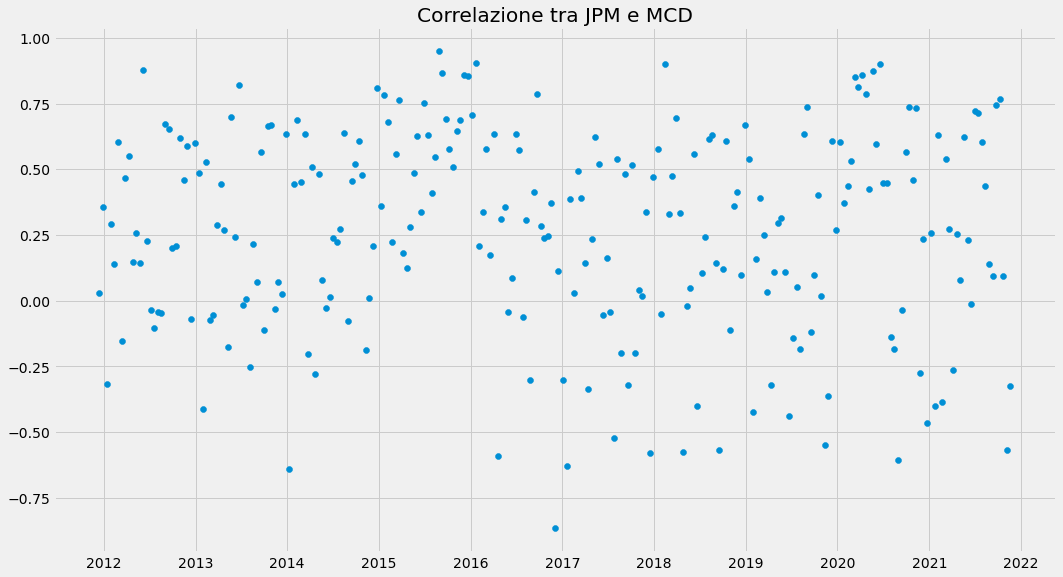

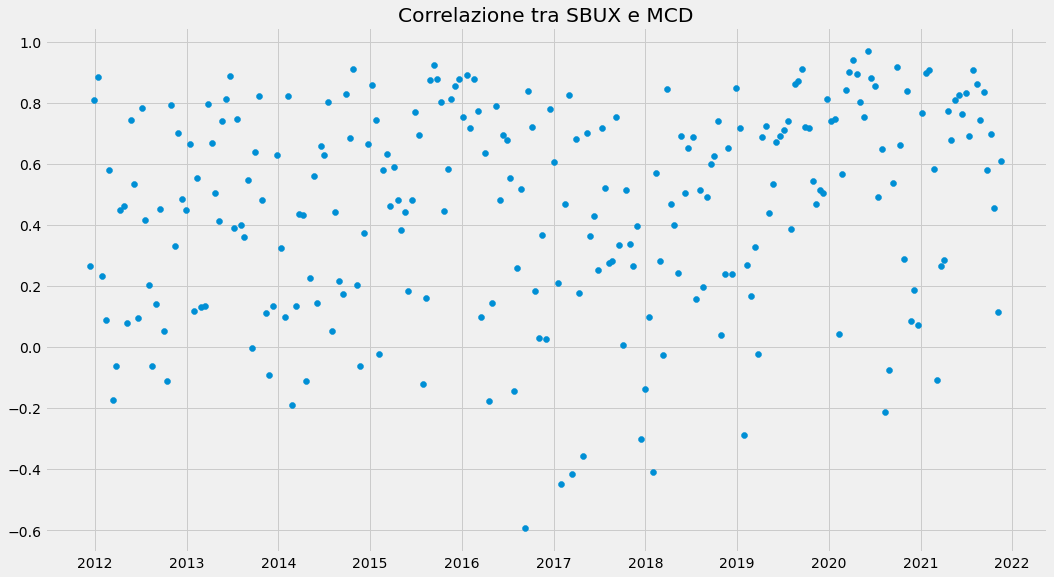

In [28]:
#Calcolo l'andamento delle correlazioni tra i titoli

#Specifico la dimensione della finestra da considerare
window = 10

# Ciclo ogni coppia di ticker in modo da non prendere più volte la stessa coppia
for a in range(0, len(tickers)):
    for b in range(a + 1, len(tickers)):
        t1 = tickers[a]
        t2 = tickers[b]
        plt.figure(figsize = (16, 9))
        plt.title('Correlazione tra ' + t1 + ' e ' + t2)
        correlations = []
        indexes = []

        # Ciclo il periodo saltando da una finestra di tempo a quella successiva
        for i in range(0, returns[t1].shape[0] - window, window):

            # Calcolo la correlazione nella finestra corrente
            df = pd.DataFrame({t1: returns[t1].iloc[i:i + window], t2: returns[t2].iloc[i:i + window]})
            correlations.append(df.corr()[t1][t2])
            indexes.append(returns[t1].index[i + window])

        # Creo il grafico passando come x le date e come y i valori delle correlazioni
        plt.scatter(indexes, correlations)

        # Salvo il grafico
        plt.savefig('./immagini/' + t1 + '_' + t2 + '_correlazione.png')


## Previsione con rete neurale

Epoch 1/6
1254/1254 [==============================] - 1s 769us/step - loss: 7.1084 - mape: 15.7701
Epoch 2/6
1254/1254 [==============================] - 1s 745us/step - loss: 3.9464 - mape: 9.0905
Epoch 3/6
1254/1254 [==============================] - 1s 769us/step - loss: 3.9523 - mape: 9.1081
Epoch 4/6
1254/1254 [==============================] - 1s 993us/step - loss: 3.9276 - mape: 9.0855
Epoch 5/6
1254/1254 [==============================] - 1s 785us/step - loss: 3.8991 - mape: 9.0194
Epoch 6/6
7/7 [==============================] - 0s 2ms/step - loss: 16.2552 - mape: 9.1094
[16.255168914794922, 9.109432220458984]
Epoch 1/7
627/627 [==============================] - 1s 759us/step - loss: 9.5416 - mape: 20.9588
Epoch 2/7
627/627 [==============================] - 1s 939us/step - loss: 3.9540 - mape: 9.1242
Epoch 3/7
627/627 [==============================] - 0s 794us/step - loss: 3.9388 - mape: 9.0997
Epoch 4/7
627/627 [==============================] - 0s 749us/step - loss: 3.929

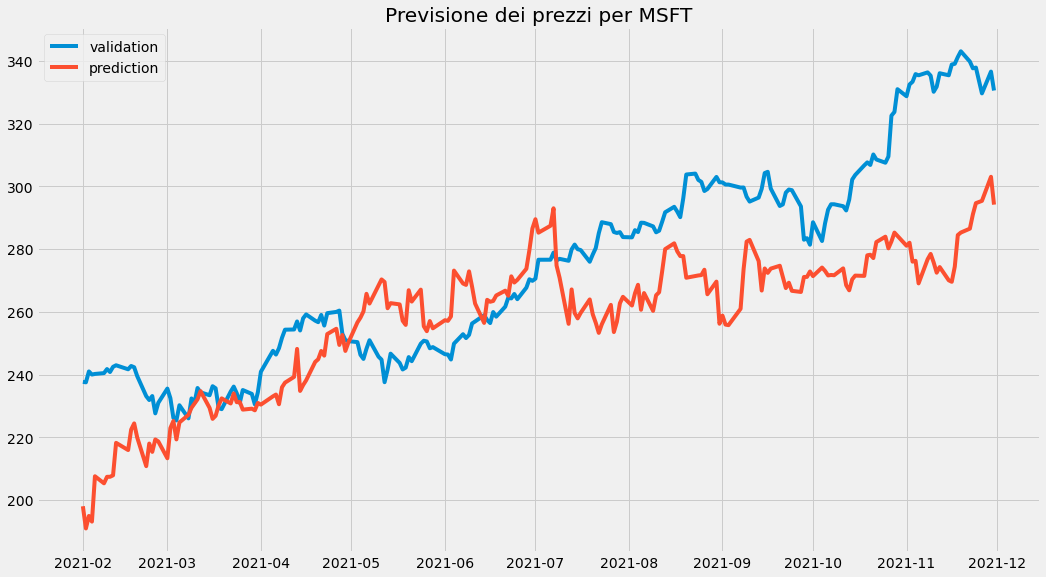

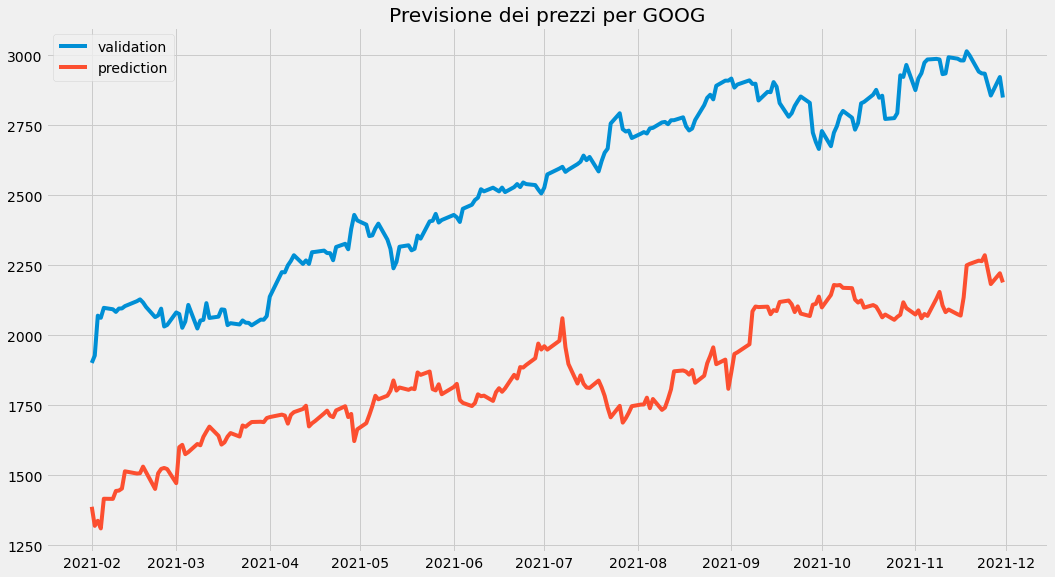

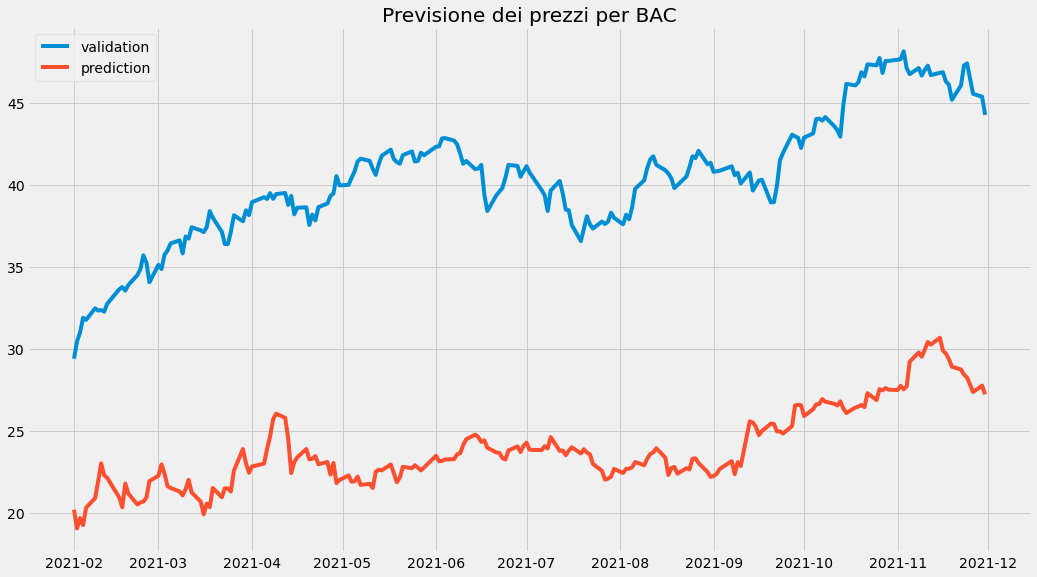

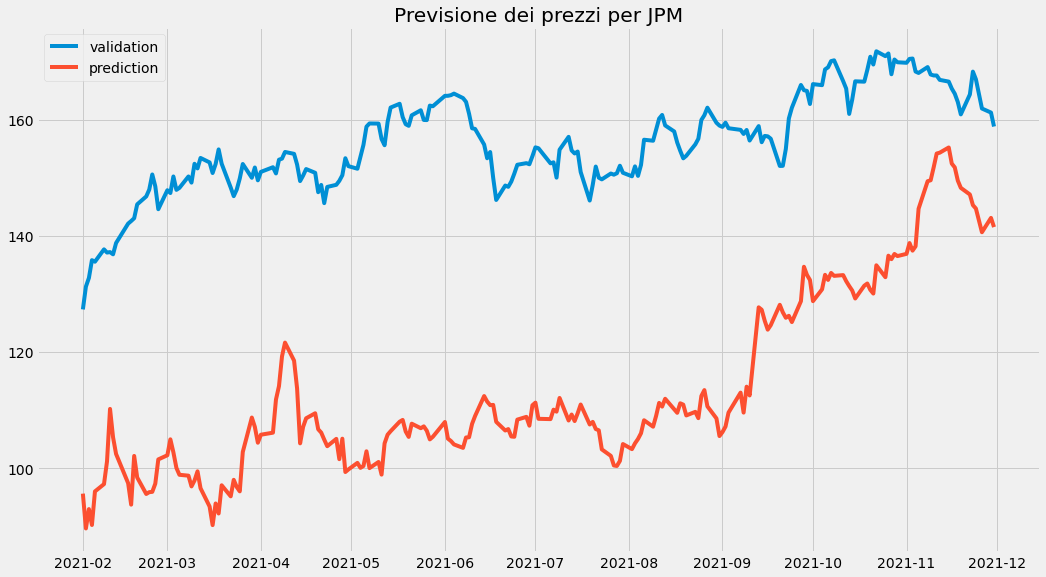

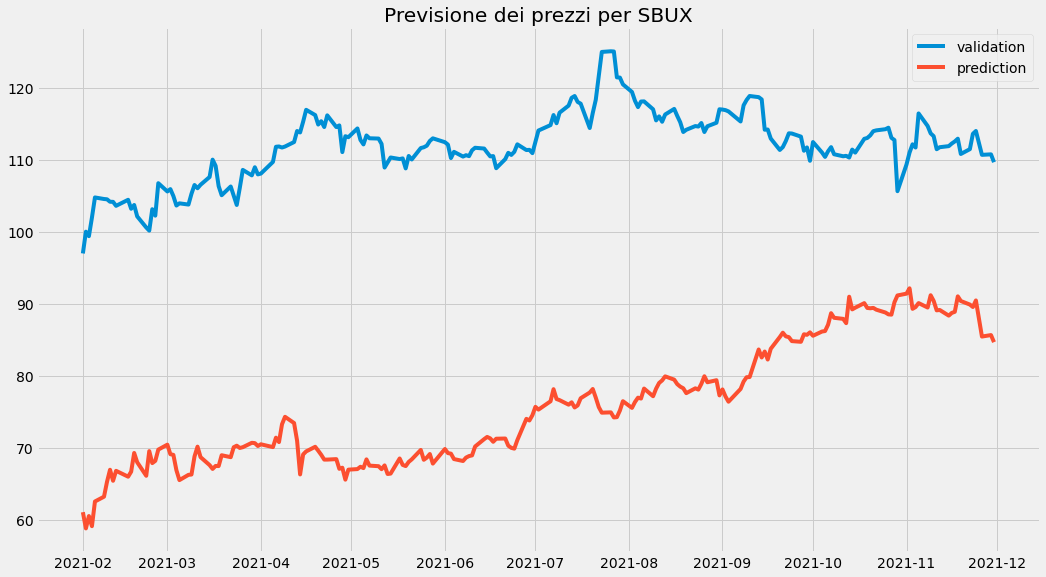

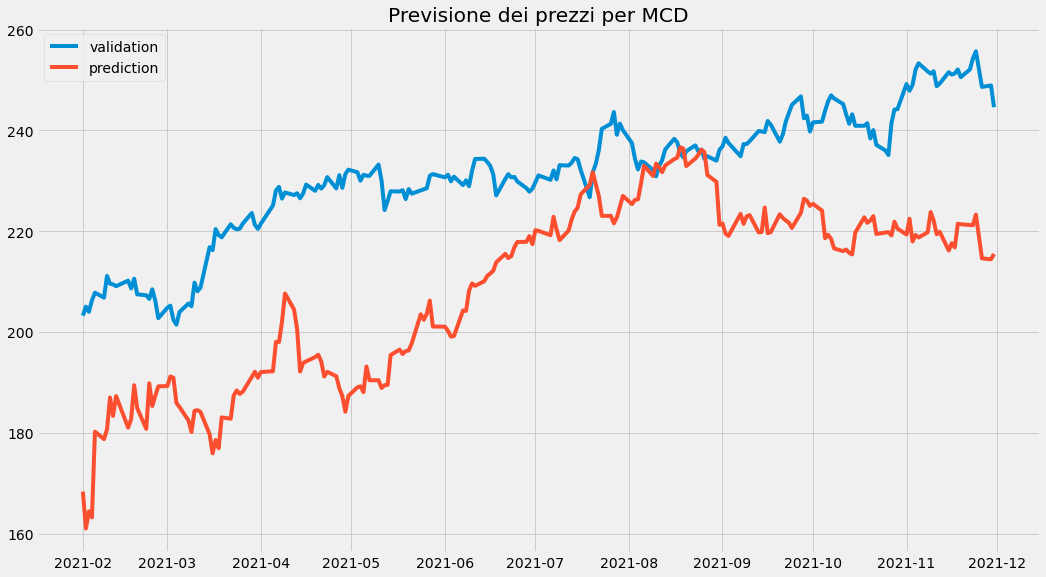

In [115]:
from tensorflow import keras
import tensorflow as tf

val = datasets[tickers[0]].loc['2021-01-31' : '2021-11-30']

# Inizializzo il dataframe con le previsioni, usando le date come indice
predicted = pd.DataFrame(index = datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - val.shape[0]:])
for ticker in tickers:

    # Divido i dati in 80 mesi di train, 30 di test e 10 di valiazione
    train = datasets[ticker]['Adj Close'].loc[start_date : '2018-07-30']
    test = datasets[ticker]['Adj Close'].loc['2018-07-31':'2021-01-30']
    validation = datasets[ticker]['Adj Close'].loc['2021-01-31':'2021-11-30']

    # Inizializzo le dimensioni dell'input e dell'output
    window_size = output_size = validation.shape[0]

    best_model = None
    best_performance = None


    # Scorro un intero per fare la ricerca dell'iperparametro migliore nel modello (epochs e batch size)
    for i in range(1, 30):

        # Creo gli input e gli output di training e test
        train_inputs = np.asarray([train[i:i+window_size] for i in range(0, train.shape[0] - output_size - window_size)]).reshape((train.shape[0] - window_size - output_size, window_size, 1))
        train_outputs = np.asarray([train[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))

        test_inputs = np.asarray([test[i:i+window_size] for i in range(test.shape[0] - window_size - output_size)]).reshape((test.shape[0] - window_size - output_size, window_size, 1))
        test_outputs = np.asarray([test[i + window_size : i + window_size + output_size] for i in range(0, test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))

        # Costruisco il modello con un layer di 50 neuroni
        model = keras.Sequential([
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(1)
        ])

        # Compilo il modello con loss function mean absolute error e come metrica l'errore percentuale
        model.compile(
            optimizer = keras.optimizers.Adam(),
            loss='mae',
            metrics = ['mape']
        )

        # Avvio il processo di learning dai dati di training
        model.fit(train_inputs, train_outputs, epochs = i + 5, batch_size=i)

        # valuto il modello e lo sostituisco a quello corrente, se ottiene un errore minore sui dati di test
        performance = model.evaluate(test_inputs, test_outputs)
        print(performance)

        if best_performance is None or performance[1] < best_performance[1]:
            best_model = model
            best_performance = performance

    # Avvio la predizione sugli ultimi 10 mesi
    predictions = pd.DataFrame(
        best_model.predict(np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - validation.shape[0] - window_size : datasets[ticker].shape[0] - validation.shape[0]]).reshape(1, window_size))[0],
        index=datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - output_size:])


    predicted[ticker] = predictions

    # Faccio un grafico che confronta il vero andamento con quello predetto dal modello
    plt.figure(figsize=(16, 9))
    plt.title('Previsione dei prezzi per ' + ticker)
    plt.plot(validation, label = 'validation')
    plt.plot(predictions, label = 'prediction')
    plt.legend()

    # Salvo il grafico
    plt.savefig('./immagini/' + ticker + '_forecast.png')

## Capital Asset Pricing Model

#### Calcolo del Beta dei titoli

In [2]:
import pandas_datareader as web

# Inizializzo il dictionary che conterrà i beta e scarico i dati di S&P500
betas = pd.DataFrame(index=['Beta'])
sp500 = web.get_data_yahoo('^GSPC', start_date, end_date)

# Calcolo il beta di ogni titolo
for ticker in tickers:
    temp = pd.DataFrame()
    temp[ticker] = datasets[ticker]['Adj Close'].resample('M').last().pct_change()
    temp['Benchmark'] = sp500['Adj Close'].resample('M').last().pct_change()
    cov_mat = temp.cov()

    # Il beta è dato dal rapporto tra la covarianza tra titolo e mercato e la varianza del mercato
    betas[ticker] = cov_mat[ticker]['Benchmark'] / cov_mat['Benchmark']['Benchmark']

pd.DataFrame(betas).to_latex('beta.tex')
print(betas)

          MSFT      GOOG       BAC       JPM      SBUX       MCD
Beta  0.961292  1.018338  1.519352  1.264511  0.805963  0.612571


### Modello Fama-French a tre fattori

In [10]:
import statsmodels.formula.api as smf


ff_regression_results = pd.DataFrame(index=['Intercept', 'MKT', 'SMB', 'HML', 'R squared'])
ff_pvalues = pd.DataFrame(index = ['Intercept', 'MKT', 'SMB', 'HML'])

# Salvo il CSV dei fattori
factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=3)

# Rimuovo la parte dei fattori annuali e tengo solo i mensili
factors = factors[factors.index < factors[factors.iloc[:, 0] == " Annual Factors: January-December "].index[0]]

# Rinomino le colonne del dataframe
factors.columns = ['Date', 'MKT', 'SMB', 'HML', 'RF']
factors['Date'] = pd.to_datetime(factors['Date'], format = '%Y%m').dt.strftime('%Y-%m')
factors = factors.set_index('Date')
factors = factors[start_date : end_date]

factors = factors.apply(pd.to_numeric, errors = 'coerce').div(100)

# Scorro i ticker per calcolare l'esposizione ai fattori Fama-French
for ticker in tickers:
    # Calcolo i ritorni semplici con granularità mensile
    y = datasets[ticker]['Adj Close'].resample('M').last().pct_change()

    # Aggiusto l'indice con la formattazione YYYY-MM
    y.index = y.index.strftime('%Y-%m')
    # Nomino la colonna del dataframe con il ticker
    y.name = ticker
    ff_data = factors.join(y)
    # Converto le colonne in float per evitare problemi di conversione di tipo

    ff_data['excess_return'] = ff_data[ticker] - ff_data['RF']

    # Avvio il modello di regressione basato sui parametri Fama-French e controllo i parametri trovati
    ff_model = smf.ols('excess_return ~ MKT + SMB + HML', data=ff_data).fit()
    ff_regression_results[ticker] = np.concatenate([ff_model.params, [ff_model.rsquared_adj]])
    ff_pvalues[ticker] = np.round(ff_model.pvalues, 3)

ff_regression_results = np.round(ff_regression_results, 3)

ff_pvalues.to_latex('Fama-French-pvalues.tex')
ff_regression_results.to_latex('Fama-French-regression.tex')

print(ff_regression_results, '\n')
print(ff_pvalues)

            MSFT   GOOG    BAC    JPM   SBUX    MCD
Intercept  0.011  0.007  0.008  0.006  0.006  0.003
MKT        1.027  1.048  1.335  1.113  0.807  0.647
SMB       -0.650 -0.538  0.207  0.011 -0.224 -0.611
HML       -0.278 -0.128  1.088  1.011  0.057  0.136
R squared  0.423  0.374  0.591  0.681  0.235  0.344 

            MSFT   GOOG    BAC    JPM   SBUX    MCD
Intercept  0.016  0.160  0.166  0.107  0.280  0.445
MKT        0.000  0.000  0.000  0.000  0.000  0.000
SMB        0.000  0.007  0.349  0.944  0.292  0.000
HML        0.049  0.411  0.000  0.000  0.730  0.216


## Strategie di trading

### Strategia 1: medie mobili sui prezzi

In [30]:
import itertools as it

best_strategies = {}
best_parameters = {}

# Per una simulazione più accurata, introduco dei costi di transazione alle strategie
transaction_cost = 0.005

for ticker in tickers:
    print(ticker)

    ## Creo i range di medie mobili da controllare e inizializzo le strutture che conterranno le migliori strategie
    sma1 = range(5, 6, 4)
    sma2 = range(30, 31, 10)
    best_strategies[ticker] = pd.DataFrame()
    best_parameters[ticker] = {'SMA': (None, None), 'EWM' : (None, None)}

    for s1, s2 in it.product(sma1, sma2):

        ## Calcolo le medie mobili
        ma1 = datasets[ticker]['Adj Close'].rolling(s1).mean()
        ma2 = datasets[ticker]['Adj Close'].rolling(s2).mean()
        ewm1 = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()
        ewm2 = datasets[ticker]['Adj Close'].ewm(span = s2, adjust = False).mean()

        # Creo i segnali di acquisto/vendita
        invested_sma = [1 if ma1.loc[i] > ma2.loc[i] else 0 for i in datasets[ticker].index]
        invested_ewm = [1 if ewm1.loc[i] > ewm2.loc[i] else 0 for i in datasets[ticker].index]

        # Calcolo i ritorni lordi semplici per poi adattarlo alle strategie
        sma_returns = (datasets[ticker]['Adj Close'].pct_change())
        ewm_returns = (datasets[ticker]['Adj Close'].pct_change())

        # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
        for i in range(len(invested_sma)):
            if invested_sma[i] == 0:
                sma_returns.iloc[i] = 0
            if invested_ewm[i] == 0:
                ewm_returns.iloc[i] = 0

        for i in range(1, len(invested_sma)):
            if invested_sma[i] != invested_sma[i - 1]:
                sma_returns[i - 1] -= transaction_cost
            if invested_ewm[i] != invested_ewm[i - 1]:
                ewm_returns[i - 1] -= transaction_cost

        # Calcolo i ritorni generati dalle strategie
        sma_returns = (sma_returns + 1).cumprod()
        ewm_returns = (ewm_returns + 1).cumprod()

        # Se i modelli sono migliori di quelli già testati, allora vengono salvati come i migliori al momento
        if not 'SMA_Returns' in best_strategies[ticker] or best_strategies[ticker]['SMA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
            best_strategies[ticker]['SMA_Returns'] = sma_returns
            best_strategies[ticker]['Invested_SMA'] = invested_sma
            best_parameters[ticker]['SMA'] = (s1, s2)

        if not 'EWM_Returns' in best_strategies[ticker] or best_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
            best_strategies[ticker]['EWM_Returns'] = ewm_returns
            best_strategies[ticker]['Invested_EWM'] = invested_ewm
            best_parameters[ticker]['EWM'] = (s1, s2)

MSFT
GOOG
BAC
JPM
SBUX
MCD


In [43]:
import itertools as it

best_vol_strategies = {}
best_vol_parameters = {}

# Per una simulazione più accurata, introduco dei costi di transazione alle strategie
transaction_cost = 0.005

for ticker in tickers:
    print(ticker)

    ## Creo i range di medie mobili da controllare e inizializzo le strutture che conterranno le migliori strategie
    sma1 = range(5, 6, 4)
    sma2 = range(30, 31, 10)
    ma1_vol = range(5, 6, 2)
    ma2_vol = range(5, 6, 2)
    best_vol_strategies[ticker] = pd.DataFrame()
    best_vol_parameters[ticker] = {'SMA': (None, None), 'EWM' : (None, None)}

    for s1, s2, s3, s4 in it.product(sma1, sma2, ma1_vol, ma2_vol):

        ## Calcolo le medie mobili
        ma1 = datasets[ticker]['Adj Close'].rolling(s1).mean()
        ma2 = datasets[ticker]['Adj Close'].rolling(s2).mean()
        ewm1 = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()
        ewm2 = datasets[ticker]['Adj Close'].ewm(span = s2, adjust = False).mean()

        vol_ma1 = datasets[ticker]['Volume'].rolling(s3).mean()
        vol_ma2 = datasets[ticker]['Volume'].rolling(s4).mean()
        vol_ewm1 = datasets[ticker]['Volume'].ewm(span = s3, adjust = False).mean()
        vol_ewm2 = datasets[ticker]['Volume'].ewm(span = s4, adjust = False).mean()

        # Creo i segnali di acquisto/vendita
        invested_sma = [1 if ma1.loc[i] > ma2.loc[i] and vol_ma1.loc[i] > vol_ma2.loc[i] else 0 for i in datasets[ticker].index]
        invested_ewm = [1 if ewm1.loc[i] > ewm2.loc[i] and vol_ewm1.loc[i] > vol_ewm2.loc[i] else 0 for i in datasets[ticker].index]

        # Calcolo i ritorni lordi semplici per poi adattarlo alle strategie
        sma_returns = (datasets[ticker]['Adj Close'].pct_change())
        ewm_returns = (datasets[ticker]['Adj Close'].pct_change())

        # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
        for i in range(len(invested_sma)):
            if invested_sma[i] == 0:
                sma_returns.iloc[i] = 0
            if invested_ewm[i] == 0:
                ewm_returns.iloc[i] = 0

        for i in range(1, len(invested_sma)):
            if invested_sma[i] != invested_sma[i - 1]:
                sma_returns[i - 1] -= transaction_cost
            if invested_ewm[i] != invested_ewm[i - 1]:
                ewm_returns[i - 1] -= transaction_cost

        # Calcolo i ritorni generati dalle strategie
        sma_returns = (sma_returns + 1).cumprod()
        ewm_returns = (ewm_returns + 1).cumprod()

        # Se i modelli sono migliori di quelli già testati, allora vengono salvati come i migliori al momento
        if not 'SMA_Returns' in best_vol_strategies[ticker] or best_vol_strategies[ticker]['SMA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
            best_vol_strategies[ticker]['SMA_Returns'] = sma_returns
            best_vol_strategies[ticker]['Invested_SMA'] = invested_sma
            best_vol_parameters[ticker]['SMA'] = (s1, s2)

        if not 'EWM_Returns' in best_vol_strategies[ticker] or best_vol_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
            best_vol_strategies[ticker]['EWM_Returns'] = ewm_returns
            best_vol_strategies[ticker]['Invested_EWM'] = invested_ewm
            best_vol_parameters[ticker]['EWM'] = (s1, s2)

MSFT
GOOG
BAC
JPM
SBUX
MCD


In [44]:
print(best_vol_parameters)
for ticker in tickers:
    print(best_vol_strategies[ticker]['EWM_Returns'].iloc[-1], best_vol_strategies[ticker]['SMA_Returns'].iloc[-1], datasets[ticker]['Compounded_returns'][-1])

{'MSFT': {'SMA': (5, 30), 'EWM': (5, 30)}, 'GOOG': {'SMA': (5, 30), 'EWM': (5, 30)}, 'BAC': {'SMA': (5, 30), 'EWM': (5, 30)}, 'JPM': {'SMA': (5, 30), 'EWM': (5, 30)}, 'SBUX': {'SMA': (5, 30), 'EWM': (5, 30)}, 'MCD': {'SMA': (5, 30), 'EWM': (5, 30)}}
1.0 1.0 15.966939356177875
1.0 1.0 9.542097526363643
1.0 1.0 9.4018061176311
1.0 1.0 6.756974565880105
1.0 1.0 5.960534525213477
1.0 1.0 3.399967591290538


In [38]:
print(best_parameters)
for ticker in tickers:
    print(best_strategies[ticker]['EWM_Returns'].iloc[-1], best_strategies[ticker]['SMA_Returns'].iloc[-1], datasets[ticker]['Compounded_returns'][-1])

{'MSFT': {'SMA': (5, 30), 'EWM': (5, 30)}, 'GOOG': {'SMA': (5, 30), 'EWM': (5, 30)}, 'BAC': {'SMA': (5, 30), 'EWM': (5, 30)}, 'JPM': {'SMA': (5, 30), 'EWM': (5, 30)}, 'SBUX': {'SMA': (5, 30), 'EWM': (5, 30)}, 'MCD': {'SMA': (5, 30), 'EWM': (5, 30)}}
13.930797964842583 4.793981983631609 15.966939356177875
8.74828517288073 2.7121633311255127 9.542097526363643
20.775180819732626 4.588798390993739 9.4018061176311
9.527689065519068 2.782993595686725 6.756974565880105
9.539721390645074 3.9877313056540404 5.960534525213477
3.712604053759872 1.3205110090239354 3.399967591290538


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


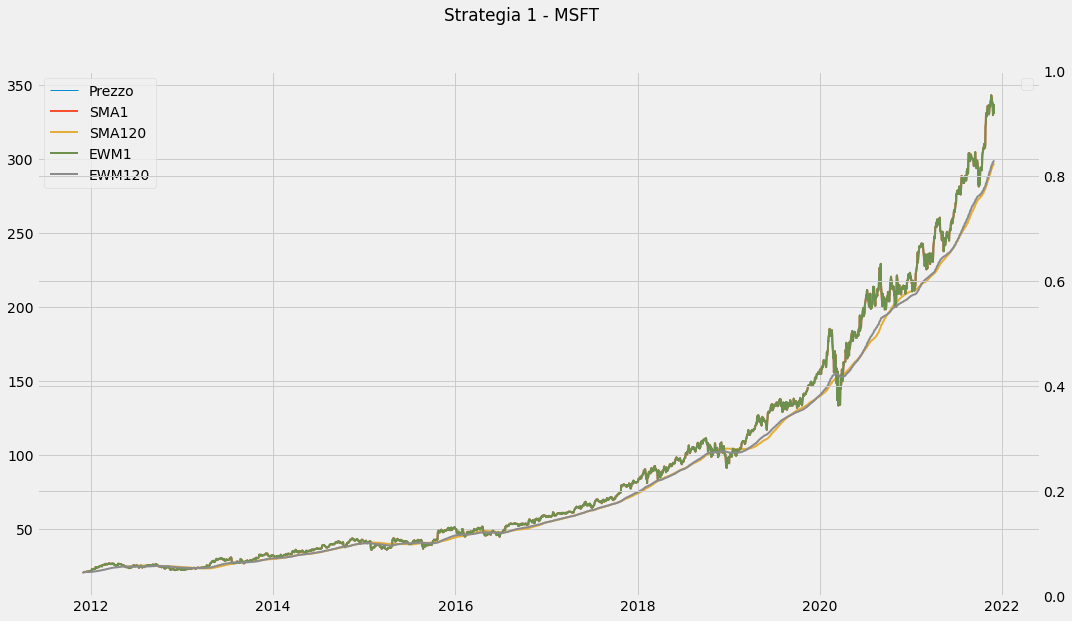

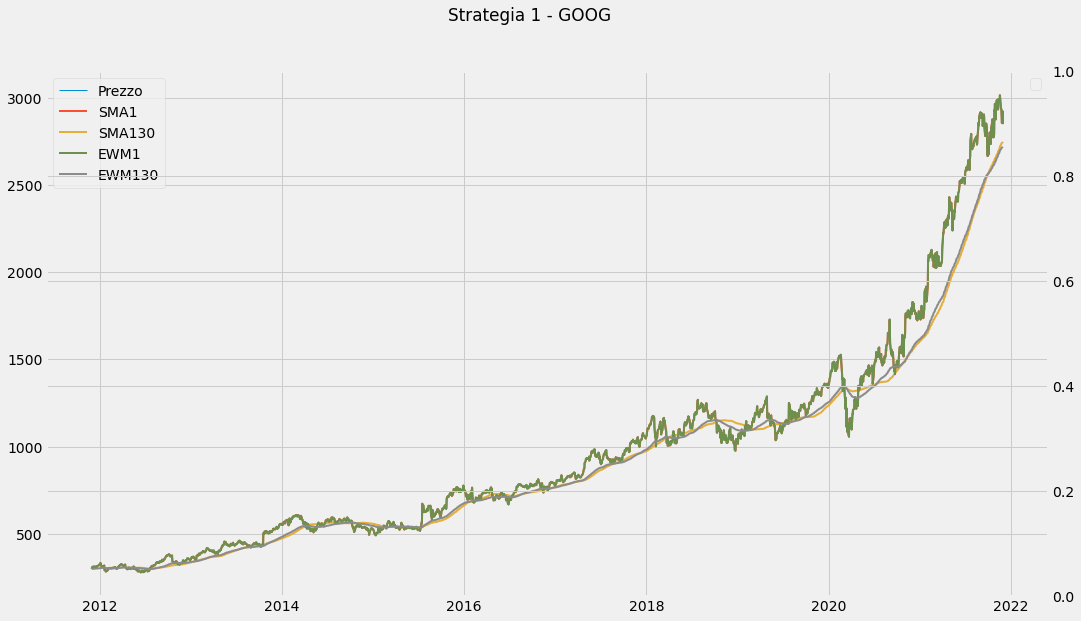

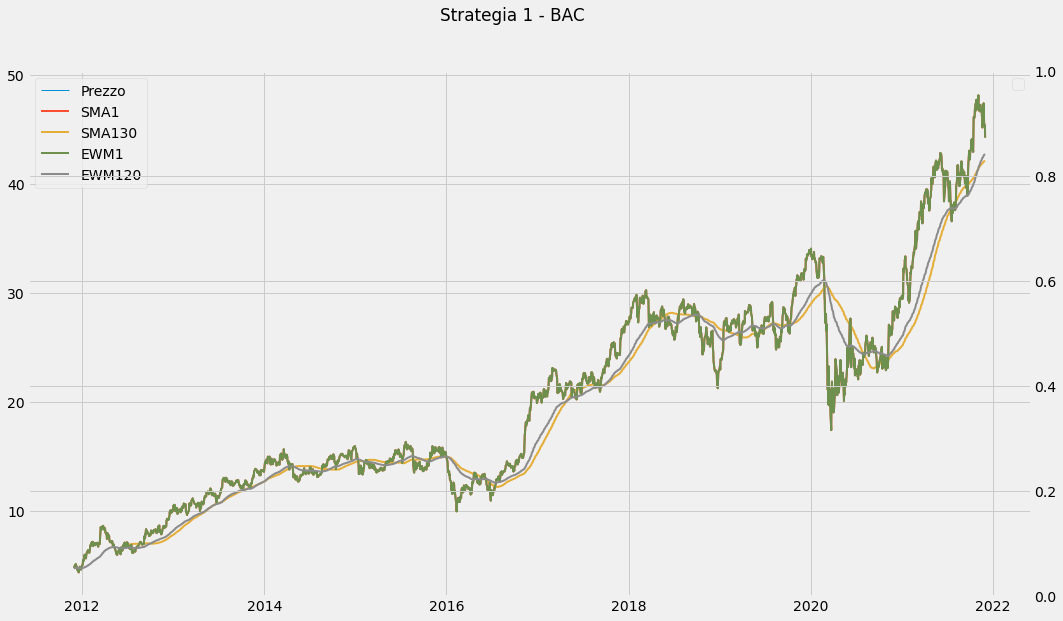

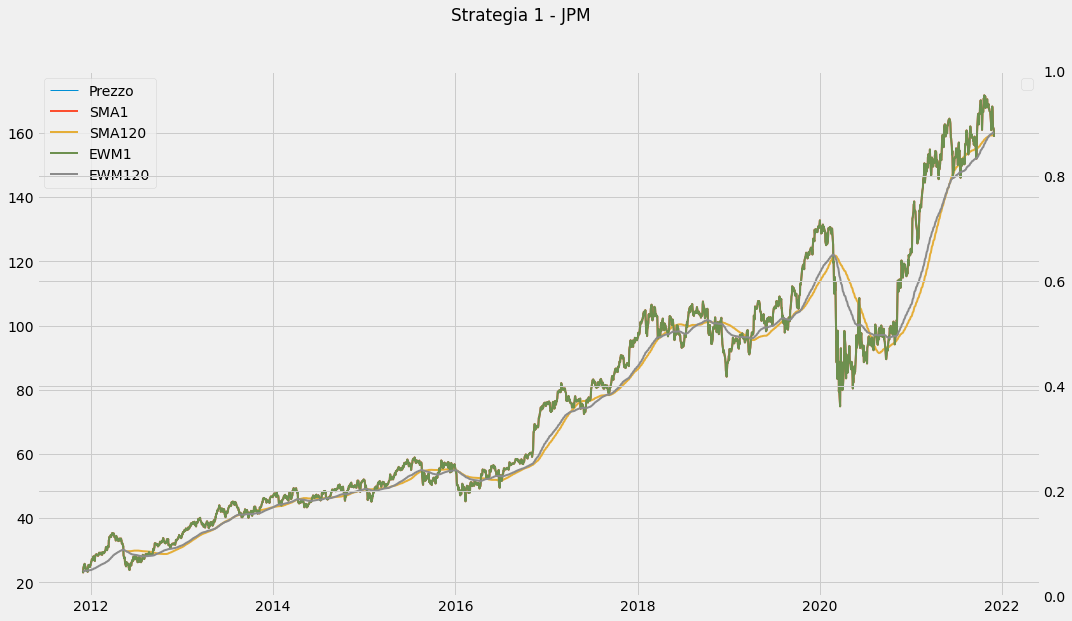

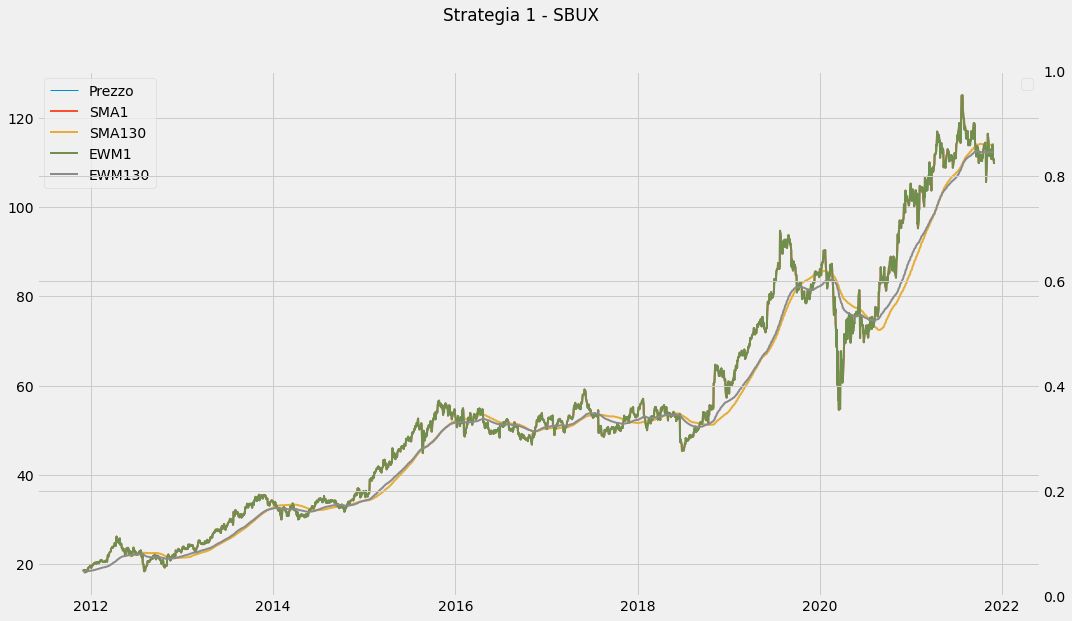

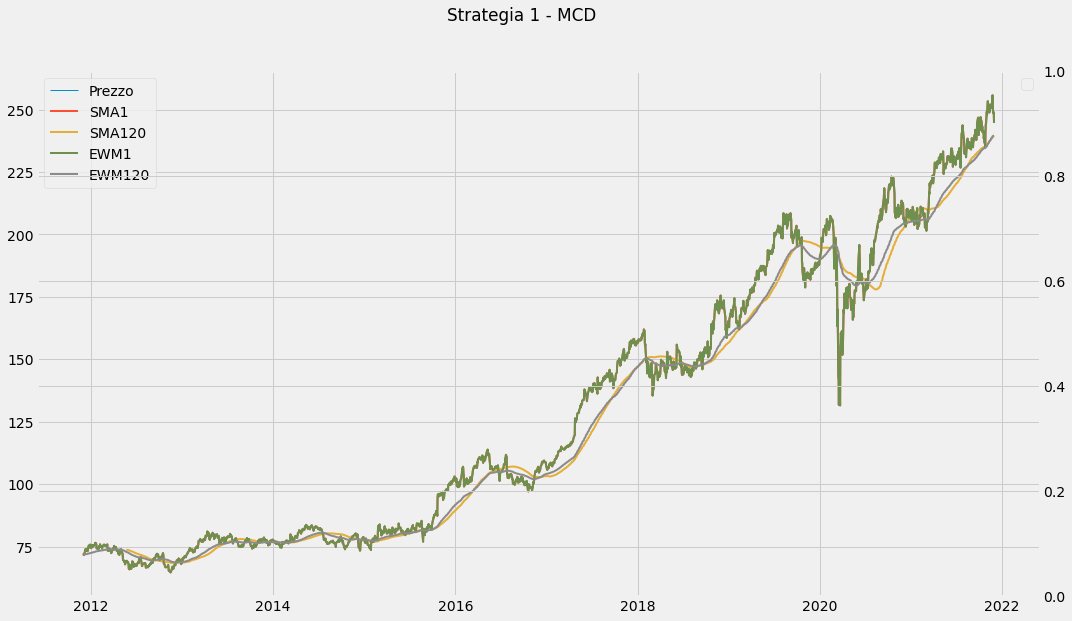

In [104]:
# Creo un grafico che contiene le migliori strategie
for ticker in tickers:
    data = datasets[ticker]['Adj Close']
    fig, ax1 = plt.subplots(figsize = (16, 9))
    fig.suptitle('Strategia 1 - ' + ticker)
    ax2 = ax1.twinx()
    ax1.plot(data, label = 'Prezzo', linewidth = 1)
    ax1.plot(data.rolling(best_parameters[ticker]['SMA'][0]).mean(), label = 'SMA' + str(best_parameters[ticker]['SMA'][0]), linewidth=2)
    ax1.plot(data.rolling(best_parameters[ticker]['SMA'][1]).mean(), label = 'SMA' + str(best_parameters[ticker]['SMA'][1]), linewidth=2)
    ax1.plot(data.ewm(span = best_parameters[ticker]['EWM'][0], adjust = False).mean(), label = 'EWM' + str(best_parameters[ticker]['EWM'][0]), linewidth = 2)
    ax1.plot(data.ewm(span = best_parameters[ticker]['EWM'][1], adjust = False).mean(), label = 'EWM' + str(best_parameters[ticker]['EWM'][1]), linewidth = 2)
    #ax2.plot(best_strategies[ticker]['Invested_SMA'], color = 'r', linestyle = 'dashed', label = 'Strategia MA', linewidth = 2)
    #ax2.plot(best_strategies[ticker]['Invested_EWM'], color = 'g', linestyle = 'dashed', label = 'Strategia EWM', linewidth = 2)
    ax2.legend()
    ax1.legend()

In [ ]:
from pytrends.request import TrendReq
from pytrends.dailydata import get_daily_data
keywords = {'GOOG' : ['debt'], 'FB': ['debt'], 'BAC': ['debt'],
            'JPM' : ['debt'], 'SBUX':['debt'], 'MCD':['debt']}

trends_df = {}
trends = TrendReq(hl='en-US')
for ticker in tickers:
    df = pd.DataFrame()
    for keyword in keywords[ticker]:
        x = get_daily_data(keyword, 2011, 11, 2021, 11, geo='')
        df[keyword] = x[keyword]
        df.index = x.index
    print(df)
    trends_df[ticker] = pd.DataFrame()
    trends_df[ticker][keywords[ticker]] = df[keywords[ticker]].astype('float')
    trends_df[ticker].index = df.index
    trends_df[ticker].to_csv('./trends/' + ticker + '.csv', sep=',')

for ticker in tickers:
    trends_ma = trends_df[ticker].rolling(5).mean()
    new_cols = {}
    old_col_names = []
    for c in trends_ma.columns:
        new_cols[c] = c + '_MA'
        old_col_names.append(c)
    trends_ma.rename(inplace = True, columns=new_cols)
    for c in new_cols:
        trends_df[ticker][new_cols[c]] = trends_ma[new_cols[c]]
    strategy = [0 for i in range(len(trends_df[ticker]))]
    returns = datasets[ticker]['Adj Close'].pct_change() + 1
    for i in range(4, len(trends_df[ticker])):
        invest = 1
        for keyword in old_col_names:
            if trends_df[ticker][keyword].iloc[i] < trends_df[ticker][keyword + '_MA'].iloc[i]:
                invest = 0
                returns.iloc[i] = 1
        strategy[i] = invest
    trends_df[ticker]['Invest'] = strategy
    trends_df[ticker]['Return'] = returns


trends_df[tickers[0]]

In [41]:
import itertools as it

# Creo i range per gli intervalli di media mobile
ma1 = range(5, 6, 4)
ma2 = range(10, 120, 10)

best_trends_strategies = {}
best_trends_parameters = {}

for ticker in tickers:
    print(ticker)

    # Inizializzo le strutture dati che conterranno le migliori strategie e i relativi parametri
    best_trends_strategies[ticker] = pd.DataFrame()
    best_trends_parameters[ticker] = {'EWM': (None, None), 'MA':(None, None)}

    # scorro le possibili combinazioni di medie mobili
    for s1, s2 in it.product(ma1, ma2):

        # Carico i dati dal file CSV
        trends_df = pd.read_csv('trends.csv')

        # Calcolo le medie mobili e agg
        trends_ma1 = trends_df.rolling(s1).mean()
        trends_ma2 = trends_df.rolling(s2).mean()
        trends_ewm1 = trends_df.ewm(span=s1, adjust=False).mean()
        trends_ewm2 = trends_df.ewm(span=s2, adjust=False).mean()
        new_cols_ma1 = {}
        new_cols_ma2 = {}
        new_cols_ewm1 = {}
        new_cols_ewm2 = {}
        old_col_names = []

        # Rinomino le colonne per aggiungerle al dataframe
        for c in trends_ma1.columns:
            new_cols_ma1[c] = c + '_MA1'
            old_col_names.append(c)
        trends_ma1.rename(inplace = True, columns=new_cols_ma1)

        for c in trends_ma2.columns:
            new_cols_ma2[c] = c + '_MA2'
        trends_ma2.rename(inplace = True, columns=new_cols_ma2)

        for c in trends_ewm1.columns:
            new_cols_ewm1[c] = c + '_EWM1'
        trends_ewm1.rename(inplace = True, columns=new_cols_ewm1)

        for c in trends_ewm2.columns:
            new_cols_ewm2[c] = c + '_EWM2'
        trends_ewm2.rename(inplace = True, columns=new_cols_ewm2)

        # Aggiungo le colonne delle medie mobili al dataframe
        for c in new_cols_ma1:
            trends_df[new_cols_ma1[c]] = trends_ma1[new_cols_ma1[c]]
            trends_df[new_cols_ma2[c]] = trends_ma2[new_cols_ma2[c]]
            trends_df[new_cols_ewm1[c]] = trends_ewm1[new_cols_ewm1[c]]
            trends_df[new_cols_ewm2[c]] = trends_ewm2[new_cols_ewm2[c]]

        # Genero i segnali di vendita o acquisto
        strategy_MA = [0 for i in range(len(trends_df))]
        strategy_EWM = [0 for i in range(len(trends_df))]

        for i in range(4, len(trends_df)):
            invest_MA = 1
            invest_EWM = 1

            # Scorro ogni eventuale keyword da controllare per capire che tipo di segnale generare.
            # se una keyword ha una media mobile a breve termine maggiore di quelle a breve, allora impost a a 0 l'investimento:
            for keyword in old_col_names:
                if trends_df[keyword + '_MA1'].iloc[i] > trends_df[keyword + '_MA2'].iloc[i]:
                    invest_MA = 0
                if trends_df[keyword + '_EWM1'].iloc[i] > trends_df[keyword + '_EWM2'].iloc[i]:
                    invest_EWM = 0
            strategy_MA[i] = invest_MA
            strategy_EWM[i] = invest_EWM
        trends_df['Invest_MA'] = strategy_MA
        trends_df['Invest_EWM'] = strategy_EWM

        # Recupera i ritorni semplici
        ticker_returns_MA = returns[ticker].copy(deep=True)
        ticker_returns_EWM = returns[ticker].copy(deep = True)

        # imposta i ritorni semplici a 0 dove non vi sono segnali di acquisto, per non influire sul ritorni finale
        for i in range(len(returns[ticker])):
            if trends_df['Invest_MA'].iloc[i] == 0:
                ticker_returns_MA.iloc[i] = 0
            if trends_df['Invest_EWM'].iloc[i] == 0:
                ticker_returns_EWM.iloc[i] = 0

        # Calcola i ritorni generati dalla strategia
        ticker_returns_MA = (ticker_returns_MA + 1).cumprod()
        ticker_returns_EWM = (ticker_returns_EWM + 1).cumprod()

        # Sostituisco eventuali strategie migliori nella struttura dati finale
        if best_trends_parameters[ticker]['MA'] == (None, None) or best_trends_strategies[ticker]['MA_Returns'].iloc[-1] < ticker_returns_MA.iloc[-1]:
            best_trends_strategies[ticker]['MA_Returns'] = ticker_returns_MA
            best_trends_parameters[ticker]['MA'] = (s1, s2)

        if best_trends_parameters[ticker]['EWM'] == (None, None) or best_trends_strategies[ticker]['EWM_Returns'].iloc[-1] < ticker_returns_EWM.iloc[-1]:
            best_trends_strategies[ticker]['EWM_Returns'] = ticker_returns_EWM
            best_trends_parameters[ticker]['EWM'] = (s1, s2)


MSFT
GOOG
BAC
JPM
SBUX
MCD


In [105]:
import itertools as it

vix = web.get_data_yahoo('^VIX', start_date, end_date)['Adj Close']
best_vix_strategies = {}
best_vix_parameters = {}

for ticker in tickers:
    print(ticker)
    # Creo i range per gli intervalli di media mobile
    ma1 = range(42, 60, 4)
    ma2 = range(252, 280, 10)

# Inizializzo le strutture dati che conterranno le migliori strategie e i relativi parametri
    best_vix_strategies[ticker] = pd.DataFrame()
    best_vix_parameters[ticker] = {'EWM': (None, None), 'MA':(None, None)}

    # scorro le possibili combinazioni di medie mobili
    for s1, s2 in it.product(ma1, ma2):
        ma1 = vix.rolling(s1).mean()
        ma2 = vix.rolling(s2).mean()

        ewm1 = vix.ewm(span = s1, adjust = False).mean()
        ewm2 = vix.ewm(span = s2, adjust = False).mean()

        invested_sma = [1 if ma1.iloc[i] < ma2.iloc[i] else 0 for i in range(len(vix))]
        invested_ewm = [1 if ewm1.iloc[i] < ewm2.iloc[i] else 0 for i in range(len(vix))]

        sma_returns = (datasets[ticker]['Adj Close'].pct_change())
        ewm_returns = (datasets[ticker]['Adj Close'].pct_change())

        # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
        for i in range(len(invested_sma)):
            if invested_sma[i] == 0:
                sma_returns.iloc[i] = 0
            if invested_ewm[i] == 0:
                ewm_returns.iloc[i] = 0

        for i in range(1, len(invested_sma)):
            if invested_sma[i] != invested_sma[i - 1]:
                sma_returns[i - 1] -= transaction_cost
            if invested_ewm[i] != invested_ewm[i - 1]:
                ewm_returns[i - 1] -= transaction_cost


        # Calcolo i ritorni generati dalle strategie
        sma_returns = (sma_returns + 1).cumprod()
        ewm_returns = (ewm_returns + 1).cumprod()


        # Sostituisco eventuali strategie migliori nella struttura dati finale
        if best_vix_parameters[ticker]['MA'] == (None, None) or best_vix_strategies[ticker]['MA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
            best_vix_strategies[ticker]['MA_Returns'] = sma_returns
            best_vix_strategies[ticker]['Invested_SMA'] = invested_sma
            best_vix_parameters[ticker]['MA'] = (s1, s2)

        if best_vix_parameters[ticker]['EWM'] == (None, None) or best_vix_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
            best_vix_strategies[ticker]['EWM_Returns'] = ewm_returns
            best_vix_strategies[ticker]['Invested_EWM'] = invested_ewm
            best_vix_parameters[ticker]['EWM'] = (s1, s2)


MSFT
GOOG
BAC
JPM
SBUX
MCD


In [110]:
import itertools as it

vix = web.get_data_yahoo('^VIX', start_date, end_date)['Adj Close']
best_vix_price_strategies = {}
best_vix_price_parameters = {}

for ticker in tickers:
    print(ticker)
    # Creo i range per gli intervalli di media mobile
    ma1 = range(1, 1000, 30)
    ma2 = range(1, 1000, 30)

    # Inizializzo le strutture dati che conterranno le migliori strategie e i relativi parametri
    best_vix_price_strategies[ticker] = pd.DataFrame()
    best_vix_price_parameters[ticker] = {'EWM': (None, None), 'MA':(None, None)}

    # scorro le possibili combinazioni di medie mobili
    for s1, s2 in it.product(ma1, ma2):
        if s1 < s2:
            s3 = 5
            s4 = 10
            ma1 = vix.rolling(s1).mean()
            ma2 = vix.rolling(s2).mean()
            ewm1 = vix.ewm(span = s1, adjust = False).mean()
            ewm2 = vix.ewm(span = s2, adjust = False).mean()

            price_ma1 = datasets[ticker]['Adj Close'].rolling(s3).mean()
            price_ma2 = datasets[ticker]['Adj Close'].rolling(s4).mean()
            price_ewm1 = datasets[ticker]['Adj Close'].ewm(span = s3, adjust = False).mean()
            price_ewm2 = datasets[ticker]['Adj Close'].ewm(span = s4, adjust = False).mean()

            invested_sma = [1 if price_ma1.iloc[i] > price_ma2.iloc[i]
                                 and ma1.iloc[i] < ma2.iloc[i]
                            else 0 for i in range(len(vix))]
            invested_ewm = [1 if price_ewm1.iloc[i] > price_ewm2.iloc[i]
                                 and ewm1.iloc[i] < ewm2.iloc[i]
                            else 0 for i in range(len(vix))]

            sma_returns = (datasets[ticker]['Adj Close'].pct_change())
            ewm_returns = (datasets[ticker]['Adj Close'].pct_change())

            # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
            for i in range(len(invested_sma)):
                if invested_sma[i] == 0:
                    sma_returns.iloc[i] = 0
                if invested_ewm[i] == 0:
                    ewm_returns.iloc[i] = 0

            for i in range(1, len(invested_sma)):
                if invested_sma[i] != invested_sma[i - 1]:
                    sma_returns[i - 1] -= transaction_cost
                if invested_ewm[i] != invested_ewm[i - 1]:
                    ewm_returns[i - 1] -= transaction_cost


            # Calcolo i ritorni generati dalle strategie
            sma_returns = (sma_returns + 1).cumprod()
            ewm_returns = (ewm_returns + 1).cumprod()


            # Sostituisco eventuali strategie migliori nella struttura dati finale
            if best_vix_price_parameters[ticker]['MA'] == (None, None) or best_vix_price_strategies[ticker]['MA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
                best_vix_price_strategies[ticker]['MA_Returns'] = sma_returns
                best_vix_price_strategies[ticker]['Invested_SMA'] = invested_sma
                best_vix_price_parameters[ticker]['MA'] = (s1, s2)

            if best_vix_price_parameters[ticker]['EWM'] == (None, None) or best_vix_price_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
                best_vix_price_strategies[ticker]['EWM_Returns'] = ewm_returns
                best_vix_price_strategies[ticker]['Invested_EWM'] = invested_ewm
                best_vix_price_parameters[ticker]['EWM'] = (s1, s2)

MSFT
GOOG
BAC
JPM
SBUX
MCD


In [111]:
print(best_vix_price_parameters)
for ticker in tickers:
    print(best_vix_price_strategies[ticker]['EWM_Returns'].iloc[-1], best_vix_price_strategies[ticker]['MA_Returns'].iloc[-1], datasets[ticker]['Compounded_returns'][-1])

{'MSFT': {'EWM': (1, 31), 'MA': (1, 31)}, 'GOOG': {'EWM': (1, 31), 'MA': (1, 31)}, 'BAC': {'EWM': (1, 121), 'MA': (1, 31)}, 'JPM': {'EWM': (1, 121), 'MA': (1, 91)}, 'SBUX': {'EWM': (661, 961), 'MA': (1, 31)}, 'MCD': {'EWM': (661, 931), 'MA': (241, 271)}}
23.456395190127257 4.7628037675128985 15.966942297982213
30.217846367513204 9.964166174122346 9.542097526363643
62.379591128418994 11.34727485673935 9.401807070012483
26.273817478895182 5.430863291992384 6.756971276203956
10.074906032866135 2.573028070729945 5.96053637939758
3.9204635888991466 1.462809651700301 3.3999668701613577


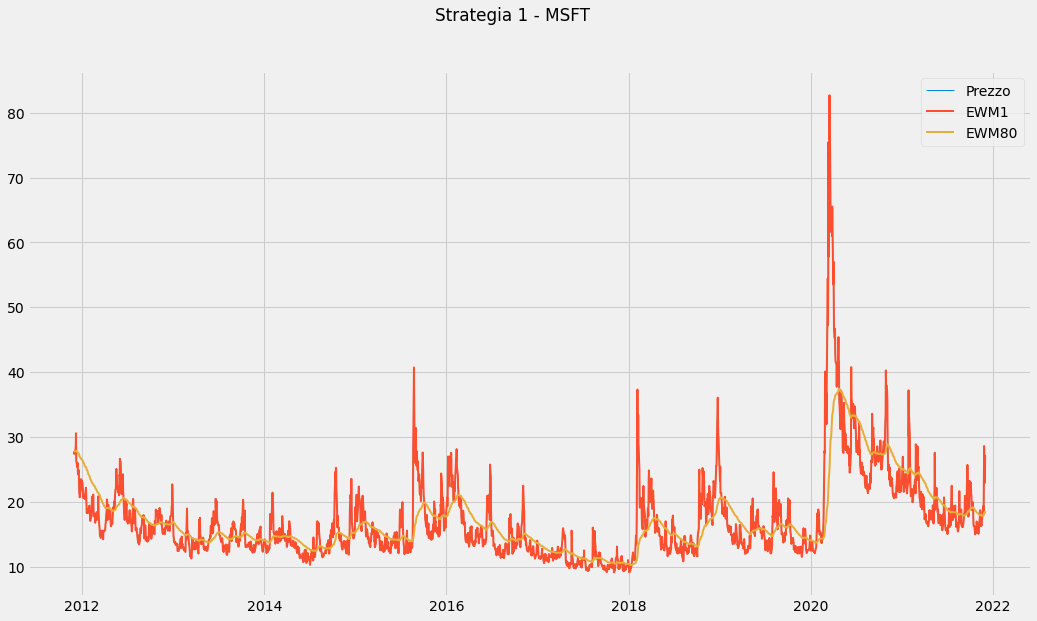

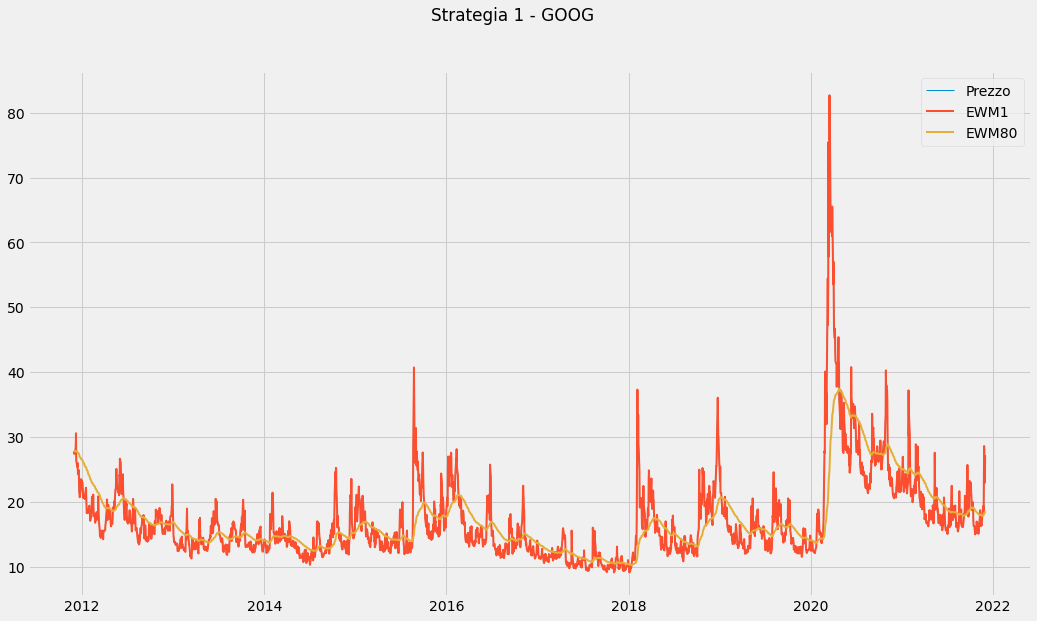

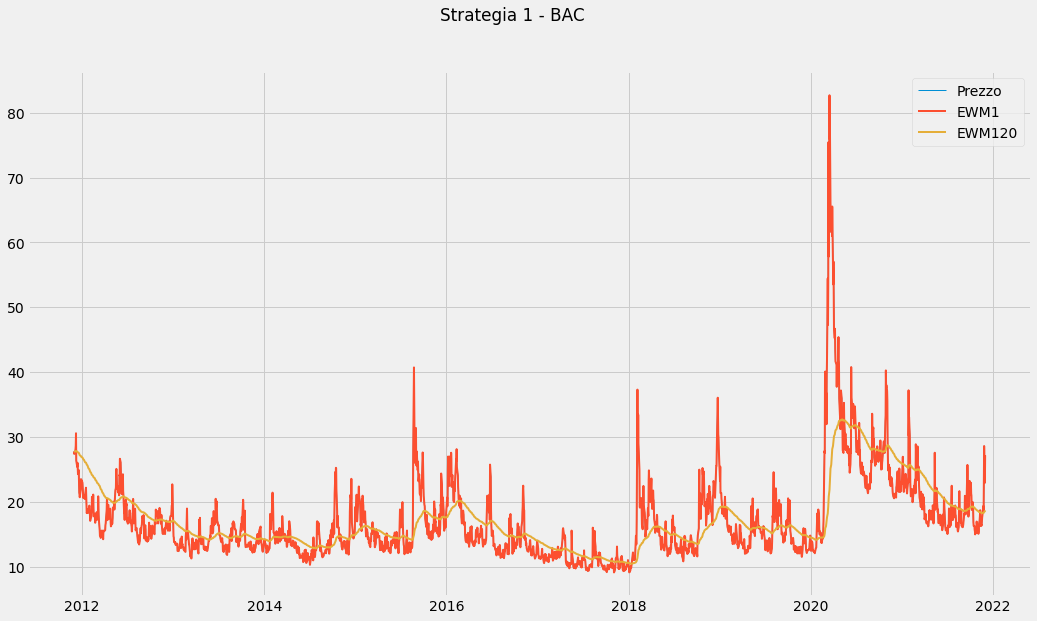

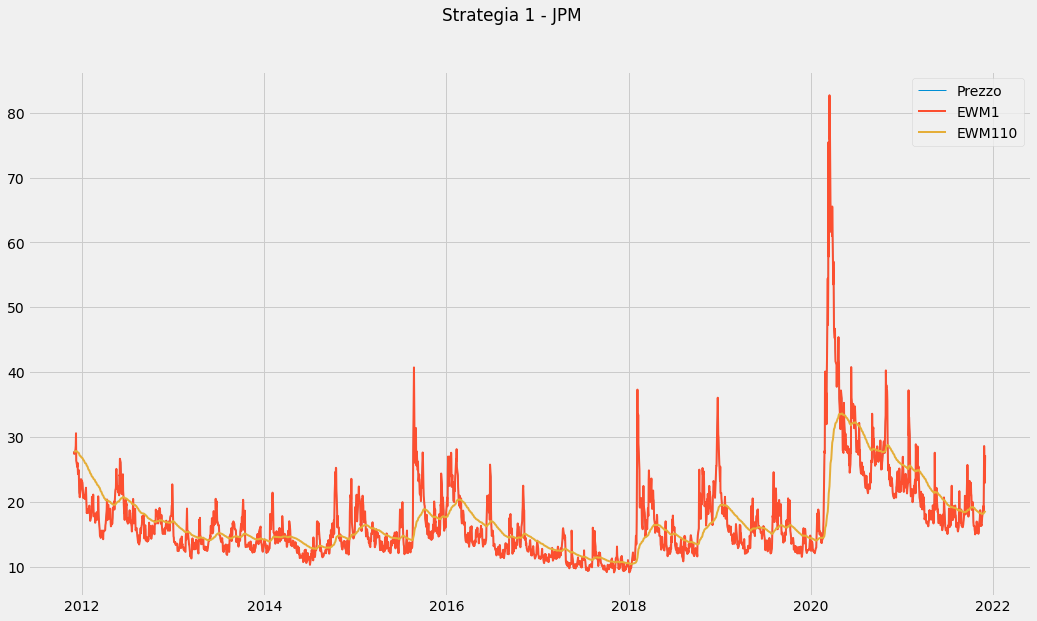

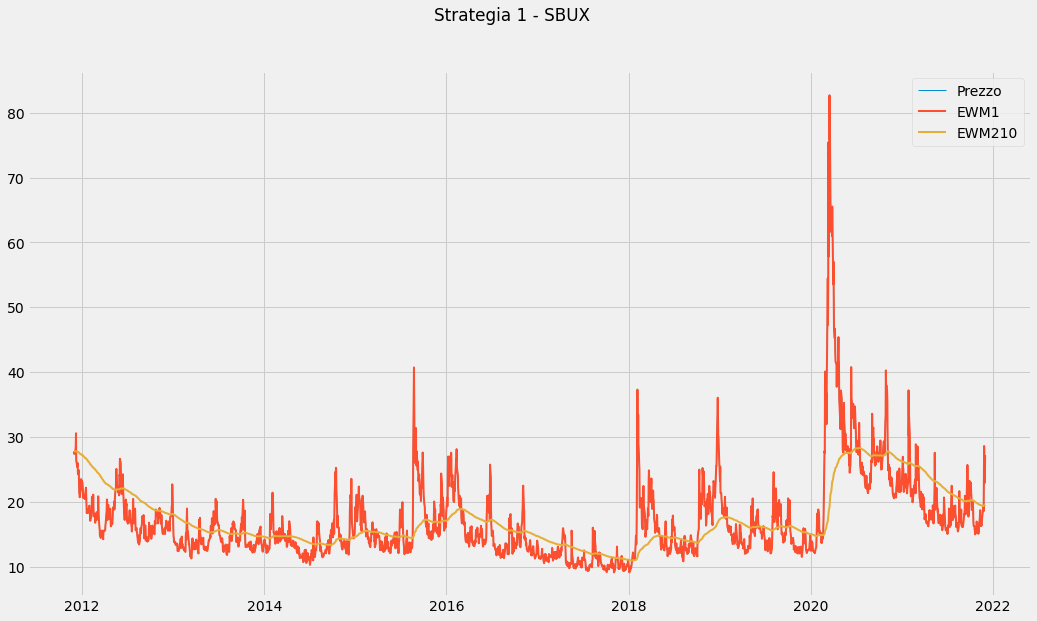

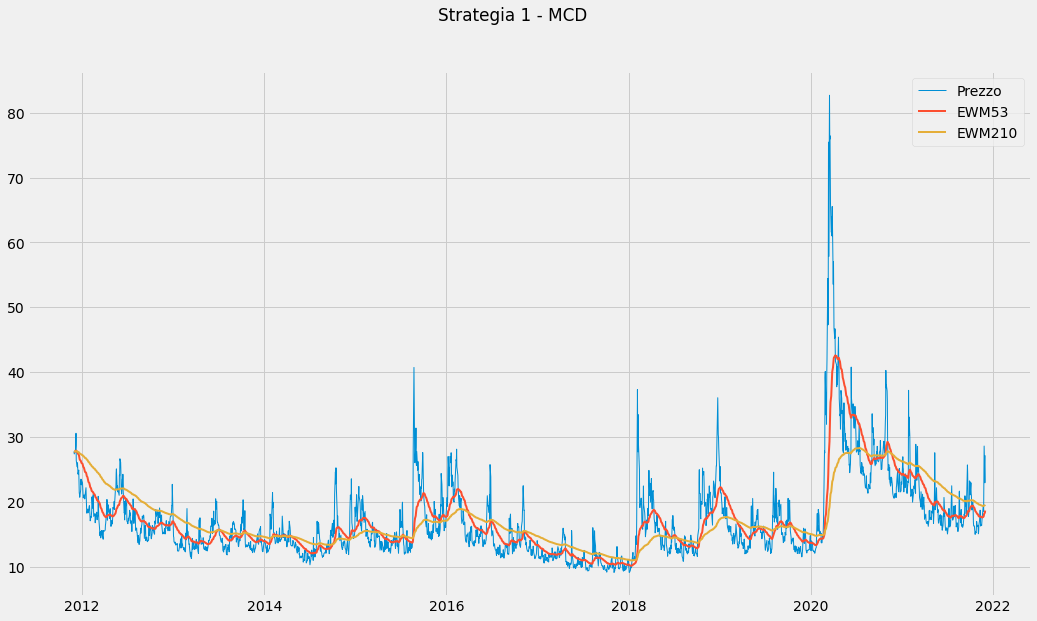

In [16]:
# Creo un grafico che contiene le migliori strategie
for ticker in tickers:
    data = vix
    fig, ax1 = plt.subplots(figsize = (16, 9))
    fig.suptitle('Strategia 1 - ' + ticker)
    #ax2 = ax1.twinx()
    ax1.plot(data, label = 'Prezzo', linewidth = 1)
    #ax1.plot(data.rolling(best_vix_parameters[ticker]['MA'][0]).mean(), label = 'SMA' + str(best_vix_parameters[ticker]['MA'][0]), linewidth=2)
    #ax1.plot(data.rolling(best_vix_parameters[ticker]['MA'][1]).mean(), label = 'SMA' + str(best_vix_parameters[ticker]['MA'][1]), linewidth=2)
    ax1.plot(data.ewm(span = best_vix_parameters[ticker]['EWM'][0], adjust = False).mean(), label = 'EWM' + str(best_vix_parameters[ticker]['EWM'][0]), linewidth = 2)
    ax1.plot(data.ewm(span = best_vix_parameters[ticker]['EWM'][1], adjust = False).mean(), label = 'EWM' + str(best_vix_parameters[ticker]['EWM'][1]), linewidth = 2)
    #ax2.plot(best_vix_strategies[ticker]['Invested_SMA'], color = 'r', linestyle = 'dashed', label = 'Strategia MA', linewidth = 2)
    #ax2.plot(best_vix_strategies[ticker]['Invested_EWM'], color = 'g', linestyle = 'dashed', label = 'Strategia EWM', linewidth = 2)
    #ax2.legend()
    ax1.legend()

In [99]:
print(best_vix_parameters)
for ticker in tickers:
    print(best_vix_strategies[ticker]['MA_Returns'].iloc[-1], best_vix_strategies[ticker]['EWM_Returns'].iloc[-1])

{'MSFT': {'EWM': (None, None), 'MA': (None, None)}, 'GOOG': {'EWM': (1, 80), 'MA': (1, 90)}, 'BAC': {'EWM': (1, 120), 'MA': (1, 190)}, 'JPM': {'EWM': (1, 110), 'MA': (1, 130)}, 'SBUX': {'EWM': (1, 210), 'MA': (1, 130)}, 'MCD': {'EWM': (53, 210), 'MA': (1, 130)}}


KeyError: 'MA_Returns'

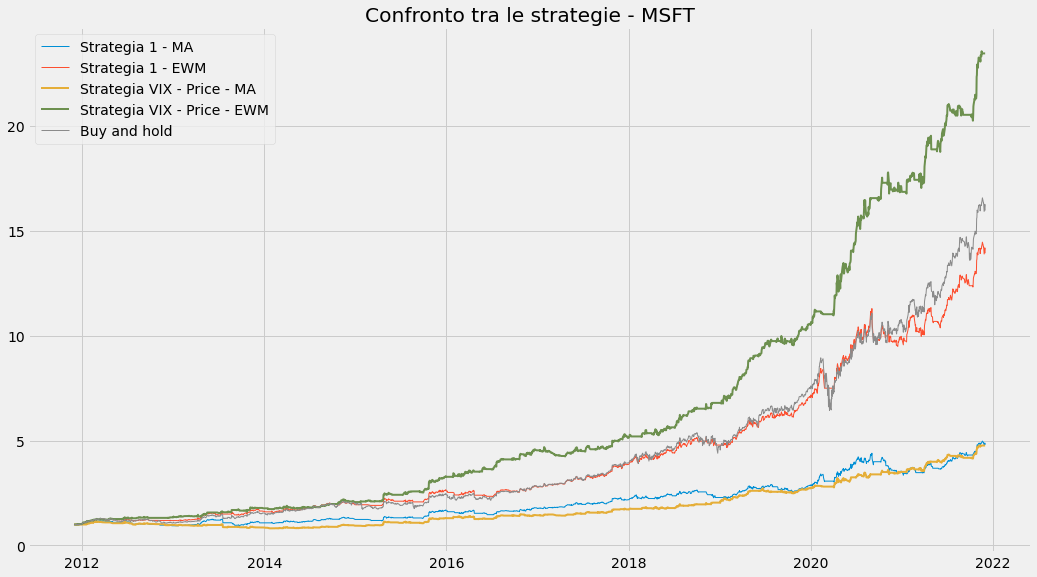

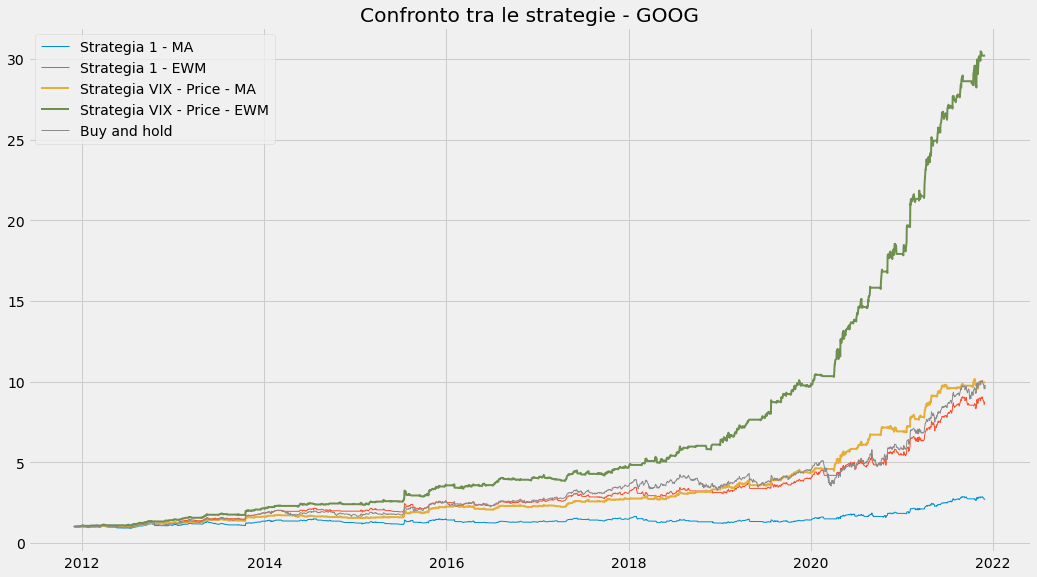

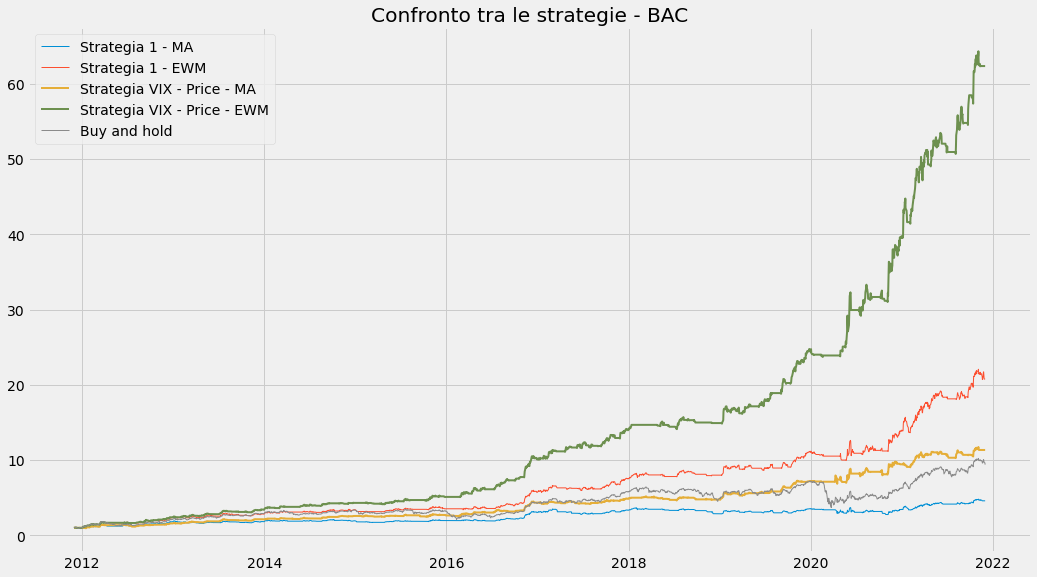

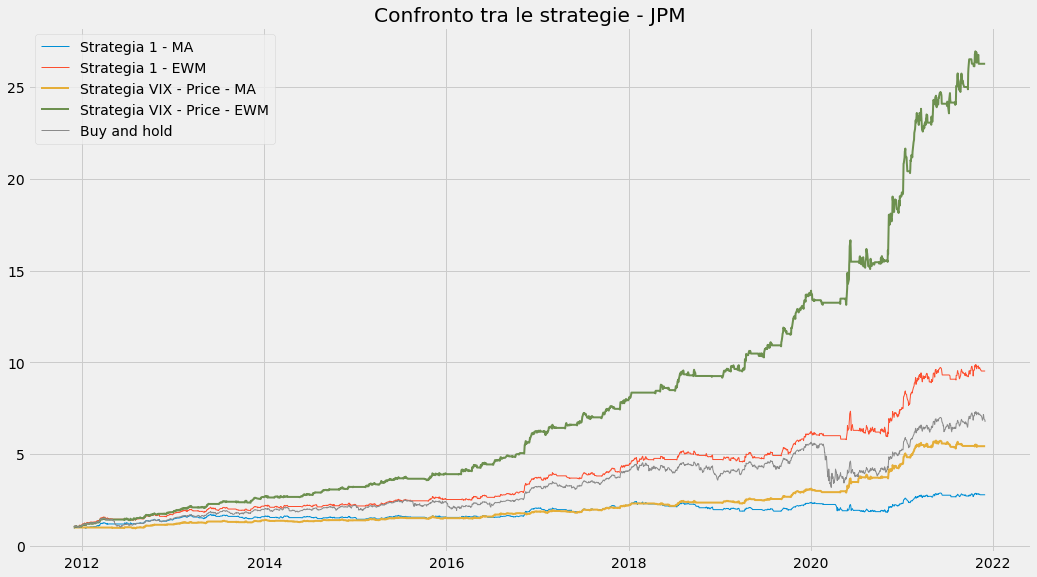

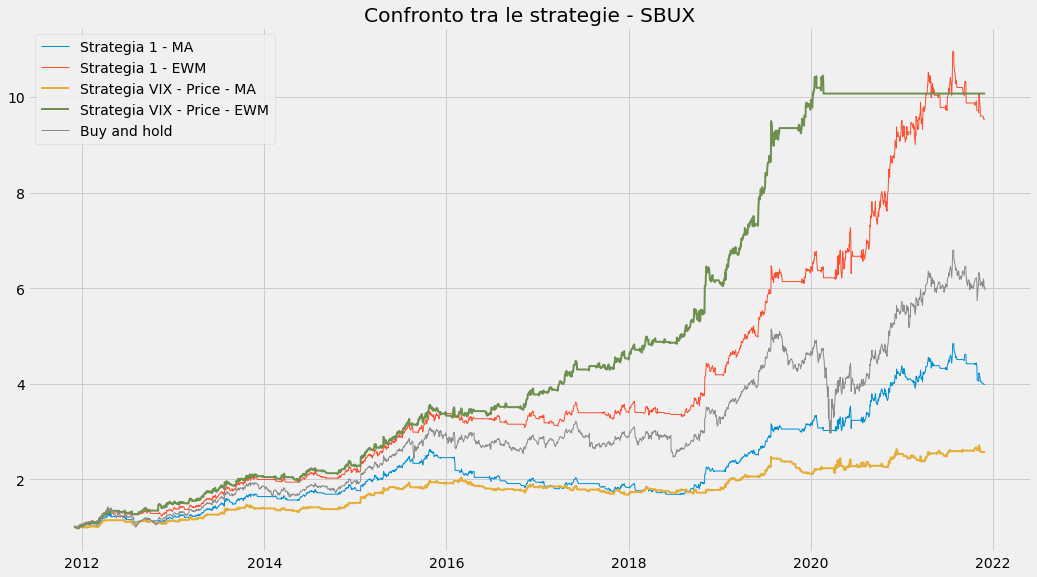

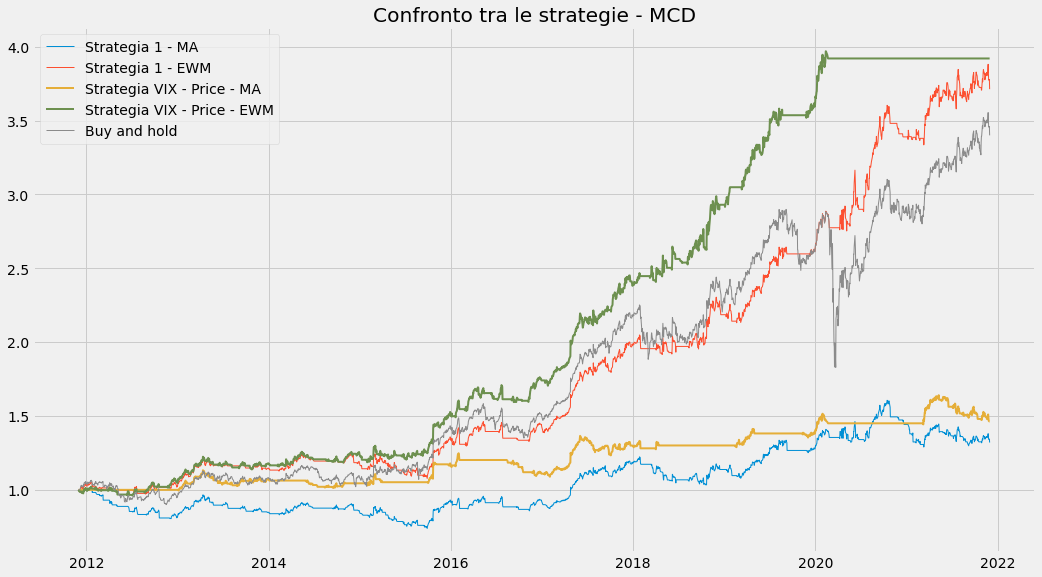

In [112]:

# Creo un grafico che contiene i ritorni composti di tutte le strategie per ogni stock.
for ticker in tickers:
    plt.figure(figsize=(16, 9))
    plt.title('Confronto tra le strategie - ' + ticker)
    plt.plot(best_strategies[ticker]['SMA_Returns'], label = 'Strategia 1 - MA', linewidth = 1)
    plt.plot(best_strategies[ticker]['EWM_Returns'], label = 'Strategia 1 - EWM', linewidth = 1)
    plt.plot(best_vix_price_strategies[ticker]['MA_Returns'], label = 'Strategia VIX - Price - MA', linewidth = 2)
    plt.plot(best_vix_price_strategies[ticker]['EWM_Returns'], label = 'Strategia VIX - Price - EWM', linewidth = 2)
    #plt.plot(best_vix_strategies[ticker]['MA_Returns'], label = 'Strategia VIX - MA', linewidth = 1)
    #plt.plot(best_vix_strategies[ticker]['EWM_Returns'], label = 'Strategia VIX - EWM', linewidth = 1)
    plt.plot(datasets[ticker]['Compounded_returns'], label = 'Buy and hold', linewidth=1)
    plt.legend()

## Ottimizzazione di portafoglio


In [116]:
import numpy as np
import scipy.optimize as sco

# Creo un dataframe che contiene i ritorni semplici netti a granularità mensile
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = datasets[ticker]['Adj Close'].resample('M').last().pct_change().dropna()['2019-11-30':'2020-11-30']

# definisco la funzione da minimizzare durante la portfolio optimization
def volatility(w, rets, mat):
    return np.sqrt(np.dot(w.T, np.dot(mat, w)))

# Definisco la funzione che cerca i portafogli efficienti
def frontiera_efficiente_analitico(ritorni, cov_mat, range_ritorni):
    portafogli_efficienti = []

    # Definisco i limiti dei pesi
    bounds = tuple((0, 1) for i in range(len(ritorni)))
    initial_guess = len(ritorni) * [1 / len(ritorni),]

    # Risolvo il problema di ottimizzazione per ogni ritorno atteso prestabilito
    for ret in range_ritorni:
        # Stabilisco i vincoli del problema di minimizzazione:
        # 1 _ Il ritorno atteso del portafogli deve essere uguale a ret
        # 2_ La somma dei pesi deve essere uguale a 1
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(ritorni * x) - ret},
                      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

        # Eseguo il problema di minimizzazione
        efficient_portfolio = sco.minimize(volatility,
                                           x0 = initial_guess,
                                           args= (ritorni, cov_mat), method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)

        portafogli_efficienti.append(efficient_portfolio.x)
    return portafogli_efficienti

# Imposto il numero di unità per annualizzare i ritorni medi
n = 12

# Creo un dataframe che contiene i ritorni attesi, basati sui dati previsti con la rete neurale
expected_returns = pd.DataFrame()
for ticker in tickers:
    expected_returns[ticker] = np.asarray(predicted[ticker])

# Aggiungo le date come indice per fare resampling mensile
expected_returns.index = datasets[tickers[0]].index[datasets[tickers[0]].shape[0] - expected_returns.shape[0]:]
expected_returns = expected_returns.resample('M').last().pct_change().dropna()

# Calcolo i ritorni attesi per ogni stock facendo la media e annualizzandola
p_returns = expected_returns.mean() * n
r_returns = data.mean() * n

# Calcolo le frontiere sia con i dati previsti che con i 12 mese antecedenti al mese 108
frontiera_previsioni = frontiera_efficiente_analitico(p_returns, expected_returns.cov() * n, np.linspace(p_returns.min(), p_returns.max(), 200))
frontiera_passati = frontiera_efficiente_analitico(r_returns, data.cov() * n, np.linspace(r_returns.min(), r_returns.max(), 200))



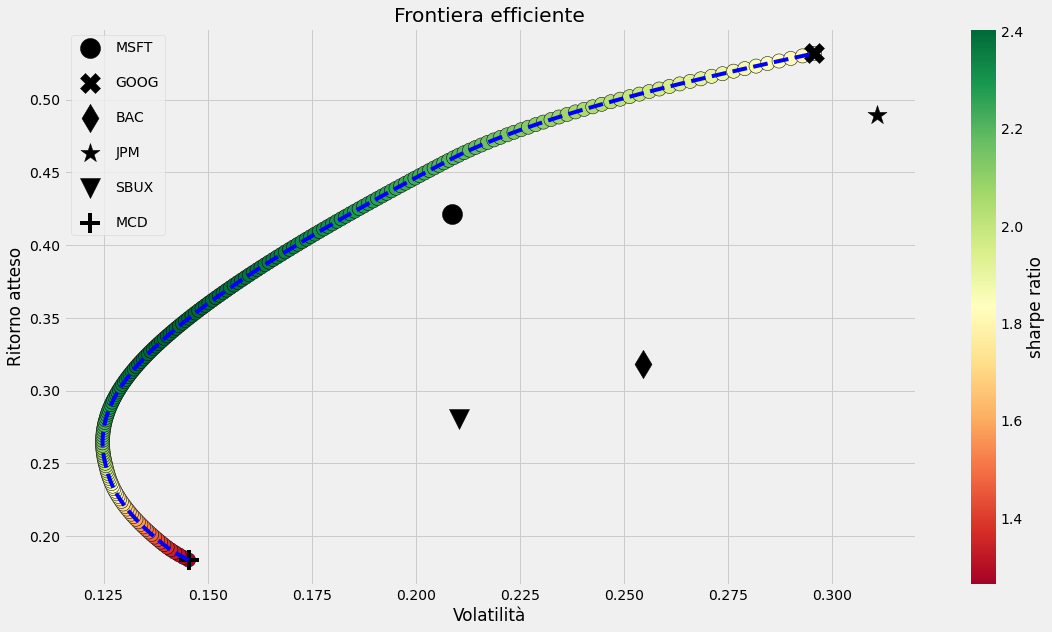

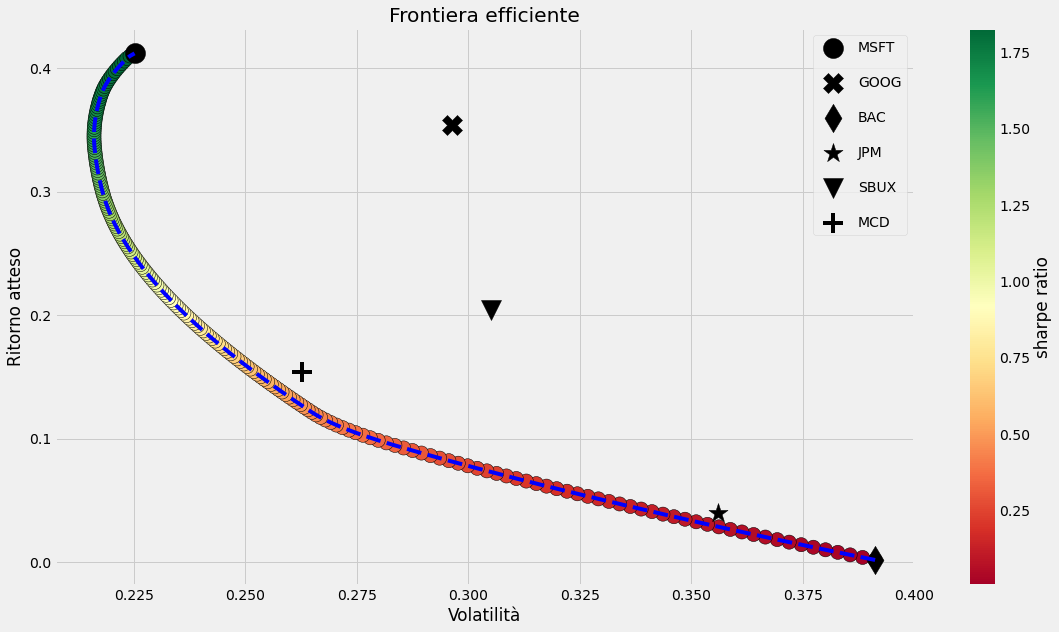

In [117]:
# Definisco una funzione che prende in input i pesi trovati al punto precendente e i ritorni attesi e restituisce un dataframe contenente i ritorni, la volatilità e lo sharpe ratio
# Parametri:
# frontier: la lista delle combinazioni di pesi
# exp_rets: I ritorni medi attesi
# return_list: la sequenza dei ritorni durante il periodo
# n: il moltiplicatore per annualizzare i ritorni
def get_portfolio_results(frontier, exp_rets, return_list, n):
    weights = []
    rets = []
    volatilities = []
    sr = []

    # Per ogni combinazione di pesi, calcola le varia statistiche del portafogli associato
    for p in frontier:
        ret = np.sum(p * return_list)
        vol = np.sqrt(np.dot(p.T, np.dot(exp_rets.cov() * n, p)))
        s_r = ret / vol
        rets.append(ret)
        weights.append(p)
        volatilities.append(vol)
        sr.append(s_r)

    result = pd.DataFrame({'weights': weights, 'returns' : rets, 'volatility': volatilities, 'sharpe ratio': sr})
    return result

# Funzione che crea il grafico di una frontiera efficiente
def plot_frontier(result, tickers, ret_list, expected_returns, n, name):
    MARKS = ['o', 'X', 'd', '*', 'v', '+']

    fig, ax = plt.subplots(figsize = (16, 9))
    result.plot(kind='scatter', x='volatility', s = 200,
                          y='returns', c='sharpe ratio',
                          cmap='RdYlGn', edgecolors='black',
                          ax=ax)
    ax.set(xlabel='Volatilità',
           ylabel='Ritorno atteso',
           title='Frontiera efficiente')
    ax.plot(result['volatility'], result['returns'], 'b--')

    for asset_index in range(6):
        ax.scatter(x=np.sqrt((ret_list.cov() * n).iloc[asset_index, asset_index]),
                   y=expected_returns[asset_index],
                   marker=MARKS[asset_index],
                   s=400,
                   color='black',
                   label=tickers[asset_index]
                   )
    ax.legend(labelspacing = 1.5)

    plt.tight_layout()
    plt.savefig('./immagini/' + name + '.png')
    plt.show()

a = get_portfolio_results(frontiera_previsioni, expected_returns, p_returns, n)
b = get_portfolio_results(frontiera_passati, data, r_returns, n)

plot_frontier(a, tickers, expected_returns, p_returns, n, 'Frontiera prezzi passati')
plot_frontier(b, tickers, data, r_returns, n, 'Frontiera ritorni futuri')

In [119]:
# Cerco i portafogli che massimizzano lo Sharpe Ratio

# Definisco una funzione di appoggio che calcola il beta. Parametri:
# returns: la lista dei ritorni di un titolo
# benchmark: la lista dei ritorni dell 'indice di benchamrk
# start, end: il periodo considerato per il calcolo del beta
def beta(returns, benchmark, start, end):
    temp_df = pd.DataFrame()
    temp_df['Ret'] = returns.loc[start:end]
    temp_df['Benchmark'] = benchmark.loc[start:end]
    cm = temp_df.cov()
    return cm['Ret']['Benchmark'] / cm['Benchmark']['Benchmark']

# Cerco i portafogli con lo sharpe ratio massimo
best_pred_portfolio = a.iloc[a['sharpe ratio'].idxmax()]
best_past_portfolio = b.iloc[b['sharpe ratio'].idxmax()]

print(best_past_portfolio['sharpe ratio'], np.round(best_past_portfolio['weights'], 3))
print(best_pred_portfolio['sharpe ratio'], np.round(best_pred_portfolio['weights'], 3))


# Calcolo i beta dei portafogli come la somma dei beta dei singoli stock pesata per la loro quota nel portafogli
beta_past_portfolio = 0
beta_pred_portfolio = 0
for i in range(0, len(tickers)):
    beta_past_portfolio += best_past_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].pct_change(), sp500['Adj Close'].pct_change(), '2019-12-01', '2020-11-30')
    beta_pred_portfolio += best_pred_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].pct_change(), sp500['Adj Close'].pct_change(), '2021-01-30', '2021-11-30')

print(beta_past_portfolio, beta_pred_portfolio)

1.8291941331732615 [1. 0. 0. 0. 0. 0.]
2.4065923471108412 [0.439 0.022 0.    0.155 0.    0.384]
1.1240321371638007 0.9039234035372902


In [133]:
# Confronto i rendimenti attesi con quelli effettivi

def get_real_return(weights, tickers, expected_returns, start_date, end_date, dataset, n):
    expected_return = np.sum(weights * expected_returns)
    real_returns = pd.DataFrame()
    for ticker in tickers:
        real_returns[ticker] = dataset[ticker]['Adj Close'].resample('M').last().pct_change()[start_date:end_date]
    real_returns = real_returns.mean() * n
    real_portfolio_return = np.sum(weights * real_returns)
    return real_portfolio_return

past_return = np.sum(best_past_portfolio['weights'] * r_returns)
real_past_return = get_real_return(best_past_portfolio['weights'], tickers, r_returns, '2020-12-01', '2021-11-30', datasets, n)

pred_return = np.sum(best_pred_portfolio['weights'] * p_returns)
real_pred_return = get_real_return(best_pred_portfolio['weights'], tickers, p_returns, '2021-01-30', '2021-11-30', datasets, n)
print(past_return, real_past_return)
print(pred_return, real_pred_return)



0.411812109032035 0.46976465542497814
0.34283257758797114 0.33123732315664894
